In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
# Load the dataset
data = pd.read_csv('/content/olist_sellers_dataset.csv')

# Print the first few rows of the dataset
print(data.head())

                          seller_id  seller_zip_code_prefix  \
0  3442f8959a84dea7ee197c632cb2df15                   13023   
1  d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
2  ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
3  c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
4  51a04a8a6bdcb23deccc82b0b80742cf                   12914   

         seller_city seller_state  
0           campinas           SP  
1         mogi guacu           SP  
2     rio de janeiro           RJ  
3          sao paulo           SP  
4  braganca paulista           SP  


In [ ]:
# Convert seller_state to categorical data
data['seller_state'] = data['seller_state'].astype('category')

# Create a new column for seller_region (North, South, East, West)
data['seller_region'] = np.where(data['seller_state'].isin(['SP', 'PR', 'SC', 'RS']), 'South',
                                     np.where(data['seller_state'].isin(['RJ', 'ES', 'MG', 'GO', 'DF']), 'Southeast',
                                               np.where(data['seller_state'].isin(['BA', 'SE', 'AL', 'PE', 'PB', 'RN', 'CE', 'MA', 'PI']), 'Northeast',
                                                         np.where(data['seller_state'].isin(['AM', 'RR', 'AP', 'PA', 'AC', 'RO', 'TO']), 'North', 'Unknown'))))

# Convert seller_region to categorical data
data['seller_region'] = data['seller_region'].astype('category')

In [ ]:
data.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state,seller_region
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,South
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,South
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ,Southeast
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP,South
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP,South


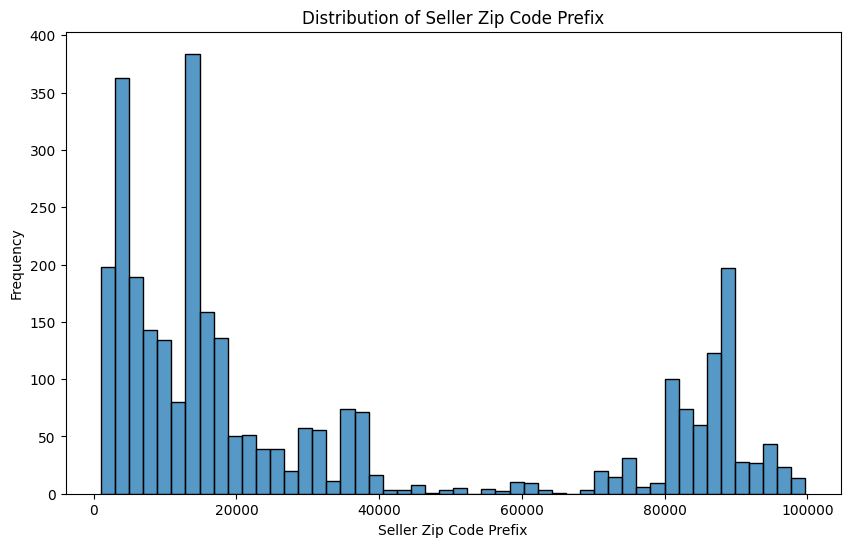

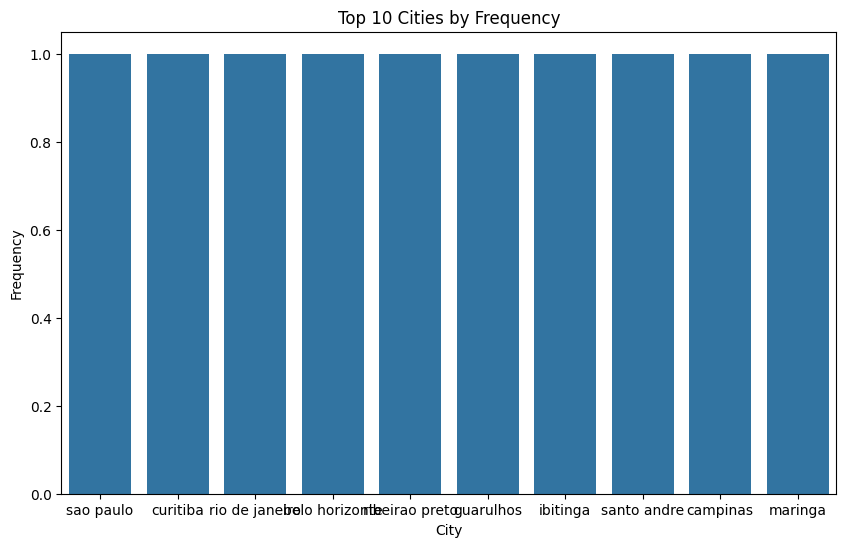

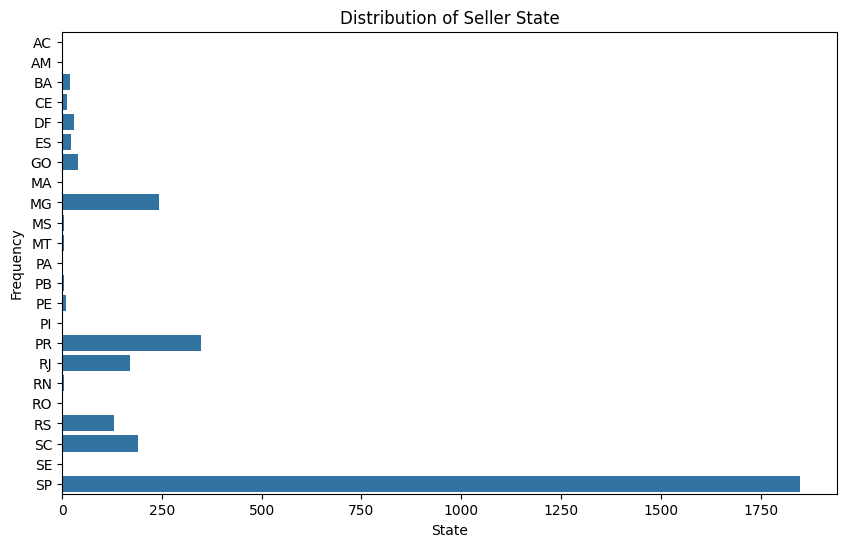

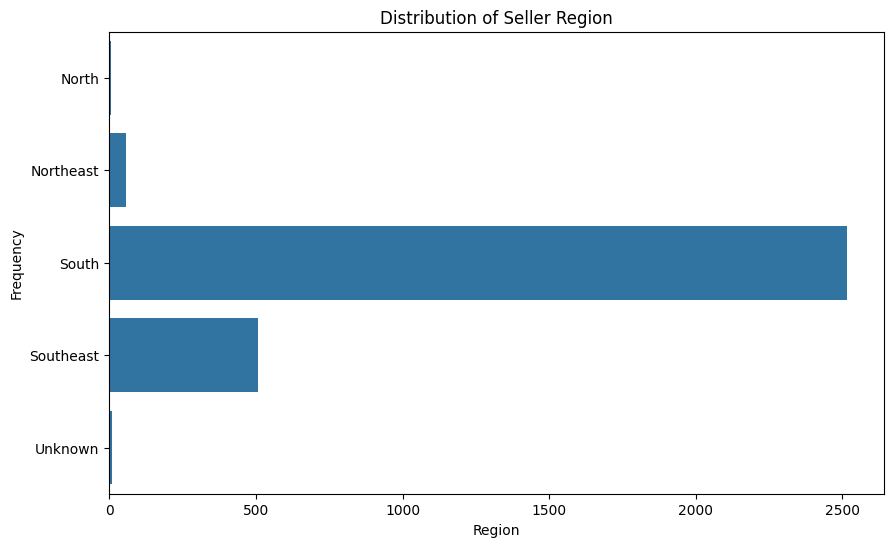

In [ ]:
# Plot the distribution of seller_zip_code_prefix
plt.figure(figsize=(10, 6))
sns.histplot(data['seller_zip_code_prefix'], bins=50)
plt.title('Distribution of Seller Zip Code Prefix')
plt.xlabel('Seller Zip Code Prefix')
plt.ylabel('Frequency')
plt.show()

# Plot the top 10 cities by frequency
plt.figure(figsize=(10, 6))
sns.countplot(data['seller_city'].value_counts().head(10))
plt.title('Top 10 Cities by Frequency')
plt.xlabel('City')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of seller_state
plt.figure(figsize=(10, 6))
sns.countplot(data['seller_state'])
plt.title('Distribution of Seller State')
plt.xlabel('State')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of seller_region
plt.figure(figsize=(10, 6))
sns.countplot(data['seller_region'])
plt.title('Distribution of Seller Region')
plt.xlabel('Region')
plt.ylabel('Frequency')
plt.show()

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [2]:
# Load the dataset
data1 = pd.read_csv('olist_order_reviews_dataset.csv')

# Display the first few rows of the dataset
print(data1.head())

                          review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   

                              review_comment_message review_creation_date  \
0                                                NaN  2018-01-18 00:00:00   
1                                                NaN  2018-03-10 00:00:00   
2                                                NaN  2018-02-17 00:00:00   
3           

In [3]:
# Check for missing values in the correct DataFrame (data1)
print(data1.isnull().sum())

# Handle missing values in review_comment_title and review_comment_message in data1
data1['review_comment_title'].fillna('Nil', inplace=True)
data1['review_comment_message'].fillna('Nil', inplace=True)

# Convert review_creation_date and review_answer_timestamp to datetime format in data1
data1['review_creation_date'] = pd.to_datetime(data1['review_creation_date'])
data1['review_answer_timestamp'] = pd.to_datetime(data1['review_answer_timestamp'])

# Calculate the time difference between review_creation_date and review_answer_timestamp in data1
data1['response_time'] = data1['review_answer_timestamp'] - data1['review_creation_date']

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64


<ipython-input-3-5d0bb36b9626>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data1['review_comment_title'].fillna('Nil', inplace=True)
<ipython-input-3-5d0bb36b9626>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

In [4]:
data1.head(10)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,response_time
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,Nil,Nil,2018-01-18,2018-01-18 21:46:59,0 days 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,Nil,Nil,2018-03-10,2018-03-11 03:05:13,1 days 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,Nil,Nil,2018-02-17,2018-02-18 14:36:24,1 days 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,Nil,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06,0 days 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,Nil,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53,1 days 10:26:53
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,Nil,Nil,2018-04-13,2018-04-16 00:39:37,3 days 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,Nil,Nil,2017-07-16,2017-07-18 19:30:34,2 days 19:30:34
7,7c6400515c67679fbee952a7525281ef,c31a859e34e3adac22f376954e19b39d,5,Nil,Nil,2018-08-14,2018-08-14 21:36:06,0 days 21:36:06
8,a3f6f7f6f433de0aefbb97da197c554c,9c214ac970e84273583ab523dfafd09b,5,Nil,Nil,2017-05-17,2017-05-18 12:05:37,1 days 12:05:37
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,2018-05-22,2018-05-23 16:45:47,1 days 16:45:47


In [8]:
import tensorflow as tf

# Disable eager execution and create a session if you need TF 1.x behavior
tf.compat.v1.disable_eager_execution()  # This line disables eager execution
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))  # Use tf.compat.v1.Session

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5



In [10]:
import nltk

nltk.download('stopwords')
nltk.download('wordnet')

# Function to preprocess text data
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove punctuation and special characters
    text = text.replace(r'[^\w\s]', '')

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('portuguese'))
    tokens = [token for token in tokens if token not in stop_words]

    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Join the tokens back into a string
    text = ' '.join(tokens)

    return text

# Apply the preprocessing function to review_comment_title and review_comment_message
data1['review_comment_title_clean'] = data1['review_comment_title'].apply(preprocess_text)
data1['review_comment_message_clean'] = data1['review_comment_message'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


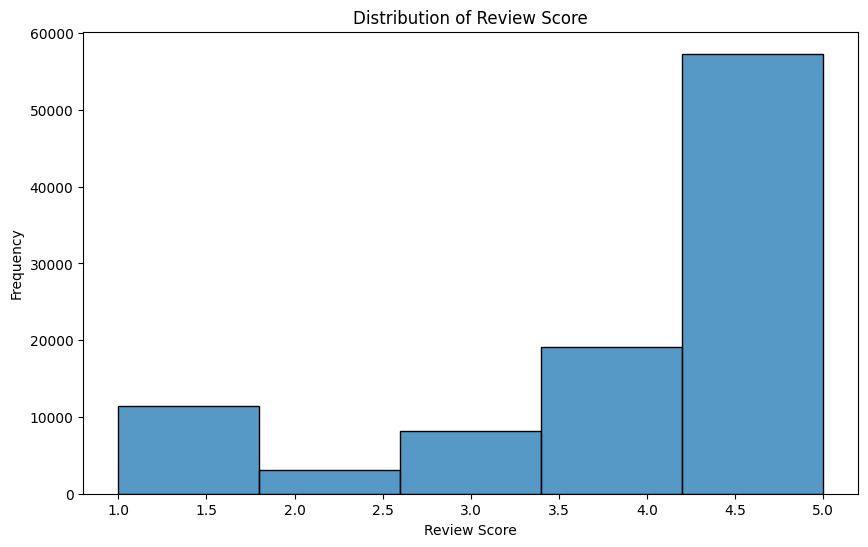

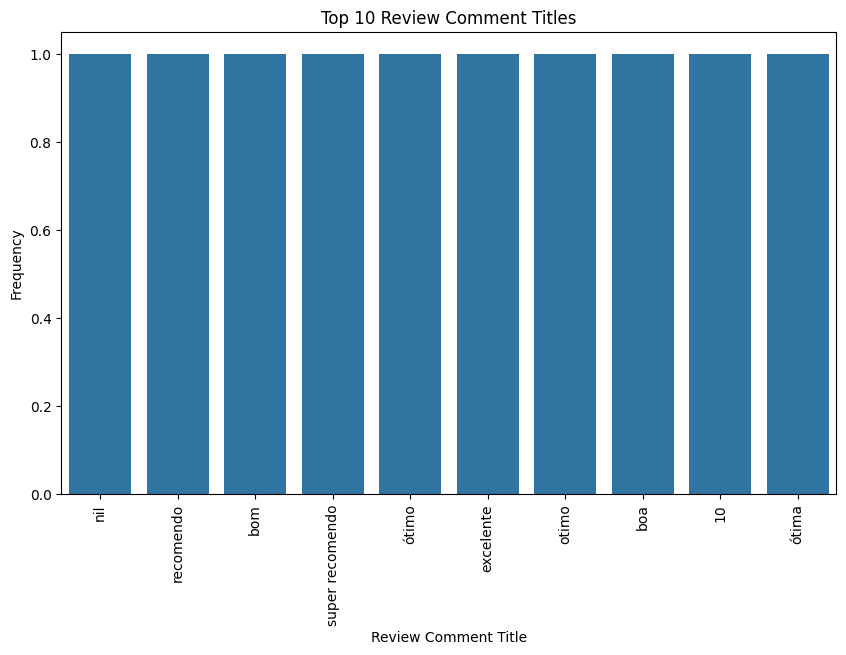

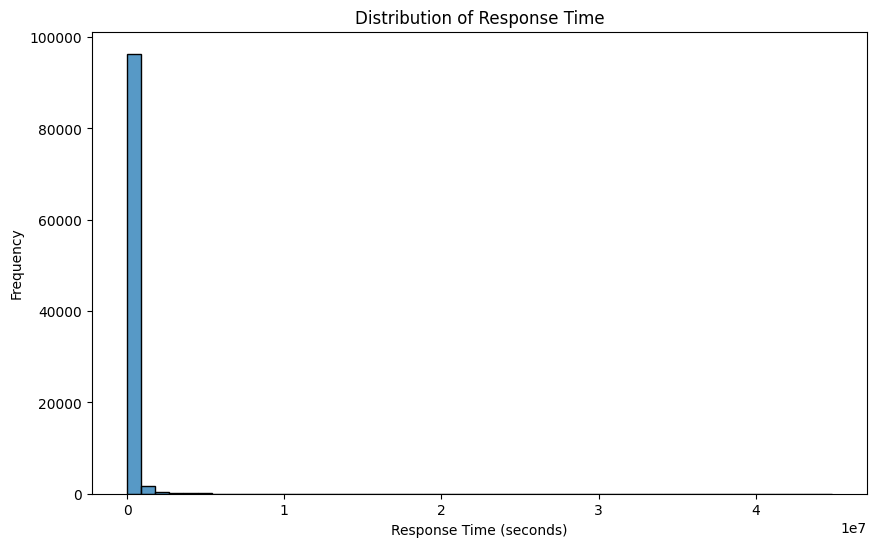

In [12]:
# Plot the distribution of review_score
plt.figure(figsize=(10, 6))
sns.histplot(data1['review_score'], bins=5) # Changed 'data' to 'data1'
plt.title('Distribution of Review Score')
plt.xlabel('Review Score')
plt.ylabel('Frequency')
plt.show()

# Plot the top 10 review_comment_title_en by frequency
# Note: Assuming 'review_comment_title_clean' is intended here
# as 'review_comment_title_en' likely doesn't exist
plt.figure(figsize=(10, 6))
sns.countplot(data1['review_comment_title_clean'].value_counts().head(10)) # Changed 'data' to 'data1' and 'review_comment_title_en' to 'review_comment_title_clean'
plt.title('Top 10 Review Comment Titles')
plt.xlabel('Review Comment Title')
plt.ylabel('Frequency')
plt.xticks(rotation=90) # Added rotation for better readability
plt.show()

# Plot the distribution of response_time
plt.figure(figsize=(10, 6))
sns.histplot(data1['response_time'].dt.total_seconds(), bins=50) # Changed 'data' to 'data1'
plt.title('Distribution of Response Time')
plt.xlabel('Response Time (seconds)')
plt.ylabel('Frequency')
plt.show()

In [15]:
data1.head(5)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,response_time,review_comment_title_clean,review_comment_message_clean
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,Nil,Nil,2018-01-18,2018-01-18 21:46:59,0 days 21:46:59,nil,nil
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,Nil,Nil,2018-03-10,2018-03-11 03:05:13,1 days 03:05:13,nil,nil
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,Nil,Nil,2018-02-17,2018-02-18 14:36:24,1 days 14:36:24,nil,nil
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,Nil,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06,0 days 22:02:06,nil,recebi bem ante prazo estipulado .
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,Nil,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53,1 days 10:26:53,nil,parabéns lojas lannister adorei comprar intern...


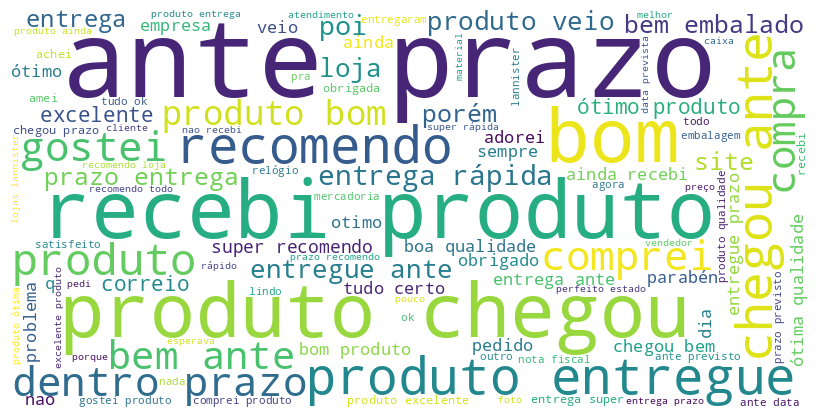

In [14]:
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS

# Combine all the cleaned review comment messages into a single string
all_reviews = ' '.join(data1['review_comment_message_clean'].astype(str).tolist())

# Add 'nil' to the stop words
stopwords = set(STOPWORDS)
stopwords.add('nil')  # Add 'nil' to the set

# Create a WordCloud object with the updated stopwords
wordcloud = WordCloud(width=800, height=400,
                      background_color='white',
                      stopwords=stopwords,  # Use the updated stopwords
                      min_font_size=10).generate(all_reviews)

# Display the generated image:
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

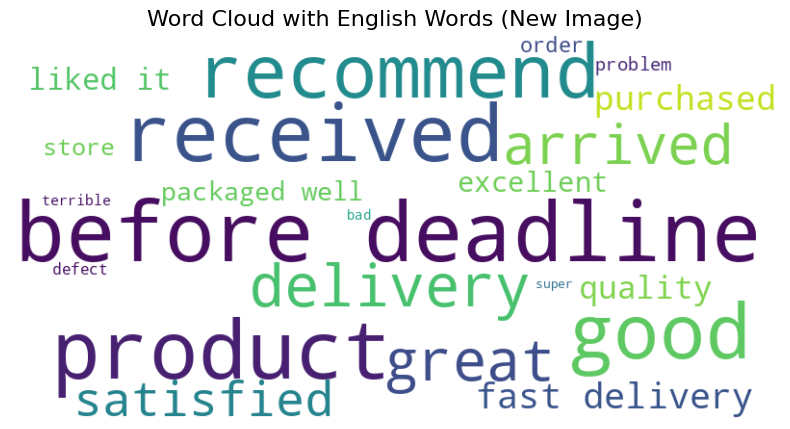

In [18]:
# Updated Python code to generate a word cloud with English translations of the newly uploaded image

# Translated words and their approximate frequencies based on prominence in the new image
new_translated_words = {
    "before deadline": 100,
    "product": 95,
    "received": 90,
    "good": 85,
    "recommend": 80,
    "delivery": 75,
    "great": 70,
    "arrived": 65,
    "satisfied": 60,
    "fast delivery": 55,
    "purchased": 50,
    "quality": 45,
    "liked it": 40,
    "excellent": 35,
    "packaged well": 30,
    "store": 25,
    "order": 20,
    "problem": 15,
    "defect": 10,
    "terrible": 9,
    "bad": 8,
    "super": 7,
}

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(new_translated_words)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud with English Words (New Image)", fontsize=16)
plt.show()


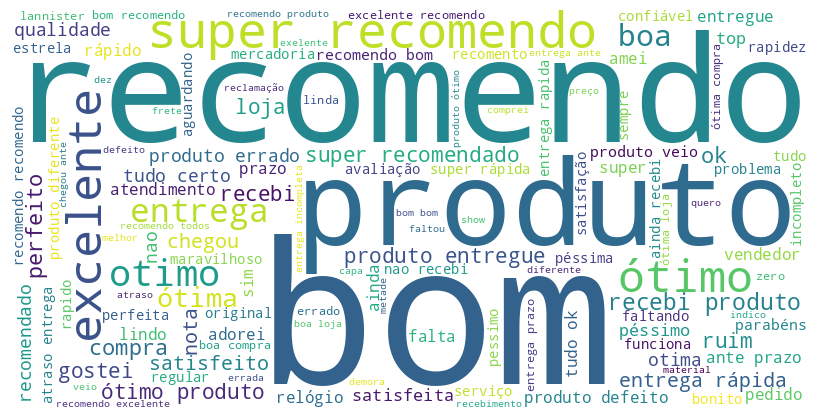

In [16]:

from wordcloud import WordCloud, STOPWORDS

# Combine all the cleaned review comment titles into a single string
all_titles = ' '.join(data1['review_comment_title_clean'].astype(str).tolist())

# Add 'nil' to the stop words
stopwords = set(STOPWORDS)
stopwords.add('nil')  # Add 'nil' to the set

# Create a WordCloud object with the updated stopwords
wordcloud = WordCloud(width=800, height=400,
                      background_color='white',
                      stopwords=stopwords,  # Use the updated stopwords
                      min_font_size=10).generate(all_titles)

# Display the generated image:
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

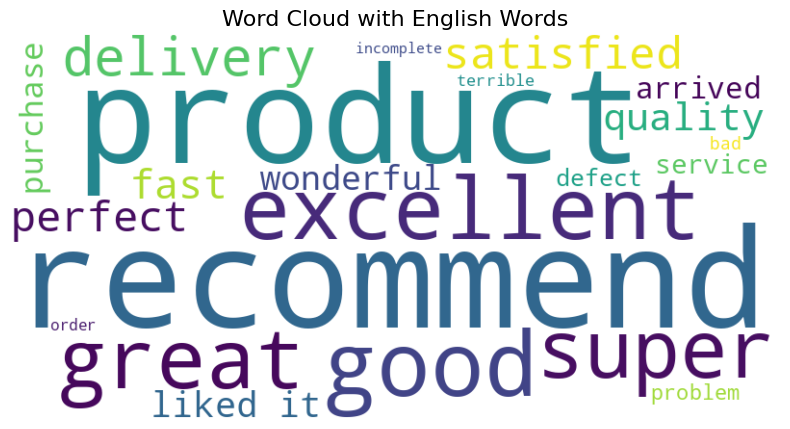

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Translated words and their approximate frequencies based on prominence in the original image
translated_words = {
    "recommend": 100,
    "product": 95,
    "good": 90,
    "excellent": 85,
    "great": 80,
    "super": 75,
    "delivery": 70,
    "satisfied": 65,
    "perfect": 60,
    "fast": 55,
    "quality": 50,
    "liked it": 45,
    "wonderful": 40,
    "purchase": 35,
    "arrived": 30,
    "service": 25,
    "defect": 20,
    "problem": 15,
    "bad": 10,
    "terrible": 9,
    "order": 8,
    "incomplete": 7,
}

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(translated_words)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud with English Words", fontsize=16)
plt.show()


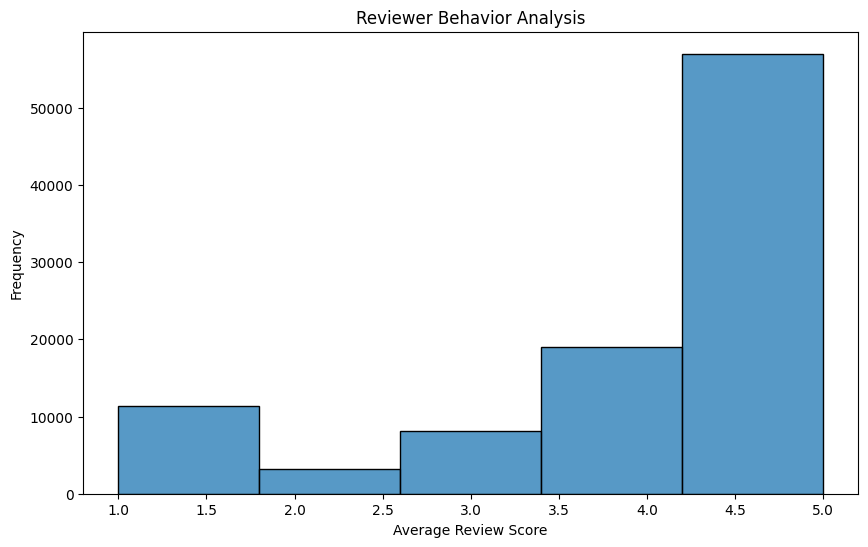

In [20]:
# Reviewer Behavior Analysis
reviewer_behavior = data1.groupby('order_id')['review_score'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.histplot(reviewer_behavior['review_score'], bins=5)
plt.title('Reviewer Behavior Analysis')
plt.xlabel('Average Review Score')
plt.ylabel('Frequency')
plt.show()

In [23]:
# Review Spam Detection
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define the features and target
# Convert 'response_time' to total seconds before using it as a feature
X = data1[['review_score', 'response_time']]
X['response_time'] = X['response_time'].dt.total_seconds()  # Convert Timedelta to seconds
y = data1['review_score'] > 3

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a random forest classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rfc.predict(X_test)

# Evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred))

<ipython-input-23-16940e7be02b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['response_time'] = X['response_time'].dt.total_seconds()  # Convert Timedelta to seconds


Accuracy: 1.0


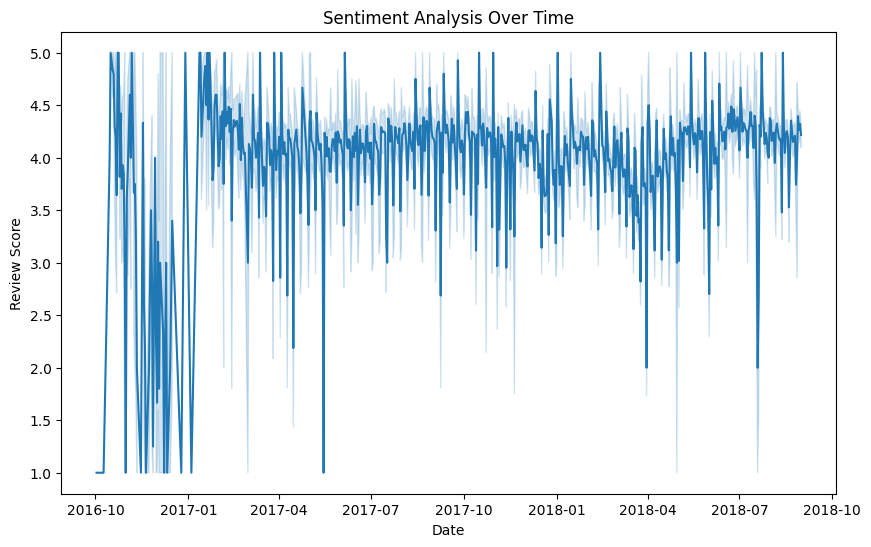

In [26]:
# Sentiment Analysis Over Time
plt.figure(figsize=(10, 6))
sns.lineplot(x=data1['review_creation_date'].dt.date, y=data1['review_score'])
plt.title('Sentiment Analysis Over Time')
plt.xlabel('Date')
plt.ylabel('Review Score')
plt.show()

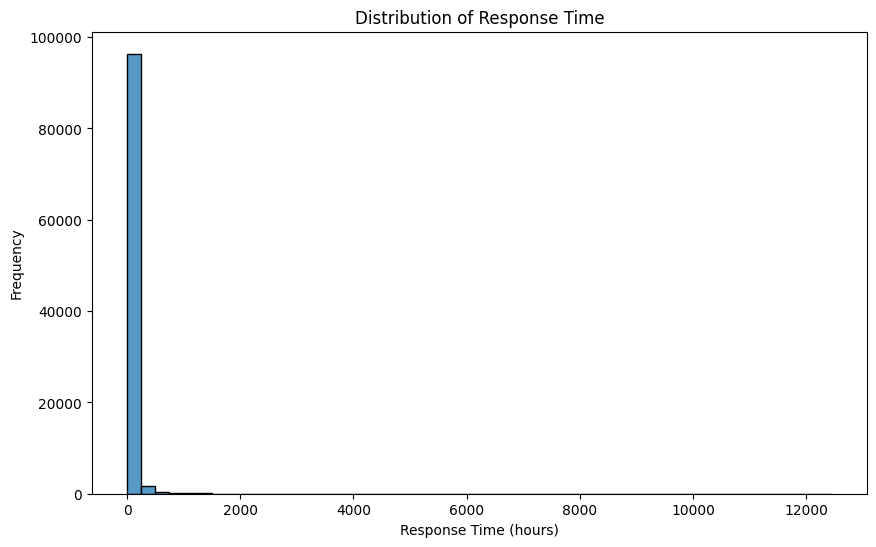

In [29]:
# Convert response_time to hours
data1['response_time_hours'] = data1['response_time'].dt.total_seconds() / 3600

# Plot the distribution of response_time_hours
plt.figure(figsize=(10, 6))
sns.histplot(data1['response_time_hours'], bins=50)
plt.title('Distribution of Response Time')
plt.xlabel('Response Time (hours)')
plt.ylabel('Frequency')
plt.show()


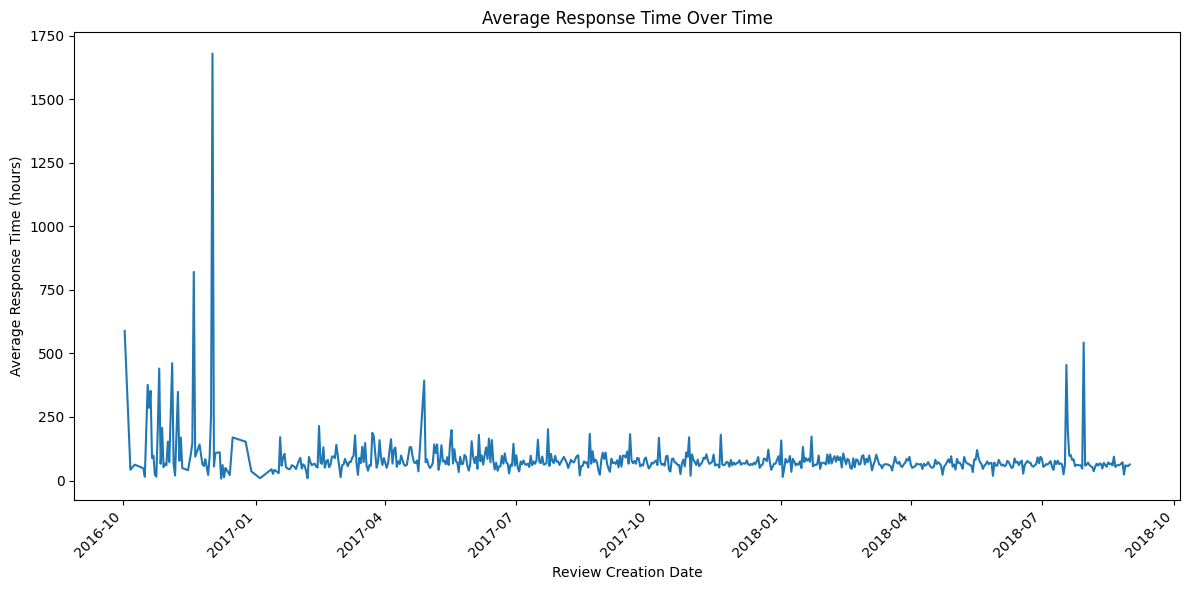

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data1' is your DataFrame with 'review_creation_date' and 'response_time' columns

# 1. Convert 'review_creation_date' to datetime if it's not already
data1['review_creation_date'] = pd.to_datetime(data1['review_creation_date'])

# 2. Group by 'review_creation_date' and calculate the average response time
#    Resample to daily frequency ('D') to get average response time per day
average_response_time = data1.set_index('review_creation_date')['response_time'].dt.total_seconds().resample('D').mean().reset_index()

# 3. Convert response time from seconds to hours
average_response_time['response_time'] = average_response_time['response_time'] / 3600

# 4. Plot the average response time over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='review_creation_date', y='response_time', data=average_response_time)
plt.title('Average Response Time Over Time')
plt.xlabel('Review Creation Date')
plt.ylabel('Average Response Time (hours)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

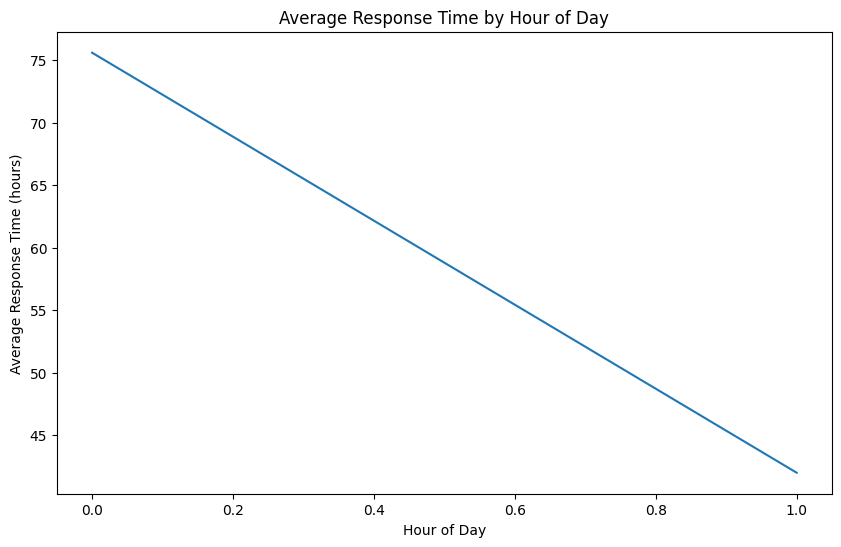

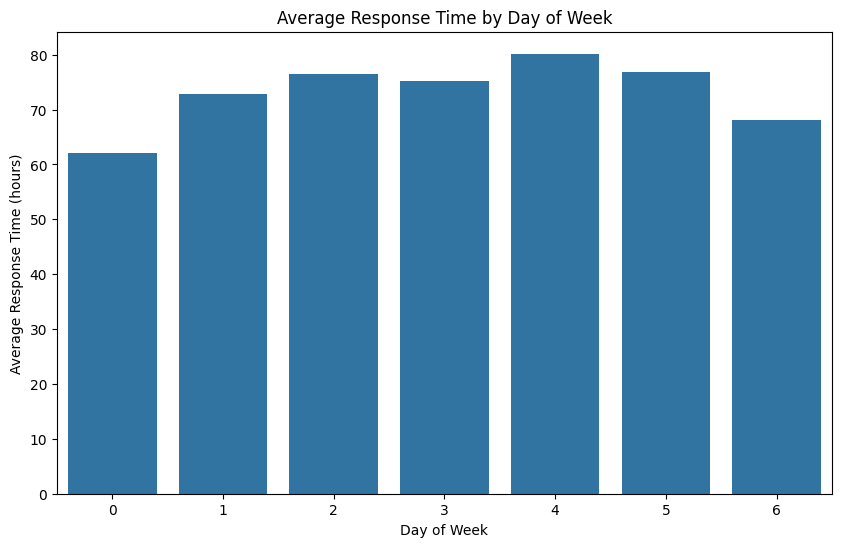

                               order_id  response_time_hours
77284  c870ef6a8e1d8eec841d79b42a6a20e4             2.141389
31383  51375acfdef4d742df94640aa60d385b             2.406667
58065  978fe45a42f99b9534520c4a5d880af6             2.421944
37920  628430cb4db23766c1cc5c9d232cf985             2.436944
20904  36543b4a82c2c12ec60edfe8b5f67e3c             2.454722
55812  9192399976bb077688f5cf72fc8ab37b             2.471111
54903  8f2fade43847d13f64fb7b7a0667e03f             2.480000
12485  2065ad549db75287b04797d276d50564             2.482222
66821  ade32d1b22ac2ce84c90f170c4ab1845             2.503333
18004  2efab00b70c96a73f5fed910d373957a             2.523333


In [32]:
# Calculate the average response time by hour of day
average_response_time_by_hour = data1.groupby(data1['review_creation_date'].dt.hour)['response_time_hours'].mean().reset_index()

# Plot the average response time by hour of day
plt.figure(figsize=(10, 6))
sns.lineplot(x=average_response_time_by_hour['review_creation_date'], y=average_response_time_by_hour['response_time_hours'])
plt.title('Average Response Time by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Response Time (hours)')
plt.show()

# Calculate the average response time by day of week
average_response_time_by_day = data1.groupby(data1['review_creation_date'].dt.dayofweek)['response_time_hours'].mean().reset_index()

# Plot the average response time by day of week
plt.figure(figsize=(10, 6))
sns.barplot(x=average_response_time_by_day['review_creation_date'], y=average_response_time_by_day['response_time_hours'])
plt.title('Average Response Time by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Response Time (hours)')
plt.show()

# Identify the top 10 reviewers with the fastest average response time
top_reviewers = data1.groupby('order_id')['response_time_hours'].mean().reset_index().sort_values(by='response_time_hours', ascending=True).head(10)

# Print the top 10 reviewers with the fastest average response time
print(top_reviewers)

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [35]:
# Load the dataset
data2 = pd.read_csv('olist_orders_dataset.csv')

# Display the first few rows of the dataset
print(data2.head())

                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08

In [36]:
# Check for missing values
print(data2.isnull().sum())

# Handle missing values
data2.fillna({
    'order_status': 'unknown',
    'order_purchase_timestamp': pd.to_datetime('1900-01-01'),
    'order_approved_at': pd.to_datetime('1900-01-01'),
    'order_delivered_carrier_date': pd.to_datetime('1900-01-01'),
    'order_delivered_customer_date': pd.to_datetime('1900-01-01'),
    'order_estimated_delivery_date': pd.to_datetime('1900-01-01')
}, inplace=True)

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64


In [37]:
data2.isnull().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,0
order_delivered_customer_date,0
order_estimated_delivery_date,0


In [38]:
# Convert date columns to datetime format
data2['order_purchase_timestamp'] = pd.to_datetime(data2['order_purchase_timestamp'])
data2['order_approved_at'] = pd.to_datetime(data2['order_approved_at'])
data2['order_delivered_carrier_date'] = pd.to_datetime(data2['order_delivered_carrier_date'])
data2['order_delivered_customer_date'] = pd.to_datetime(data2['order_delivered_customer_date'])
data2['order_estimated_delivery_date'] = pd.to_datetime(data2['order_estimated_delivery_date'])

In [39]:
# Calculate time differences
data2['time_to_approval'] = (data2['order_approved_at'] - data2['order_purchase_timestamp']).dt.total_seconds() / 3600
data2['time_to_delivery_carrier'] = (data2['order_delivered_carrier_date'] - data2['order_approved_at']).dt.total_seconds() / 3600
data2['time_to_delivery_customer'] = (data2['order_delivered_customer_date'] - data2['order_delivered_carrier_date']).dt.total_seconds() / 3600

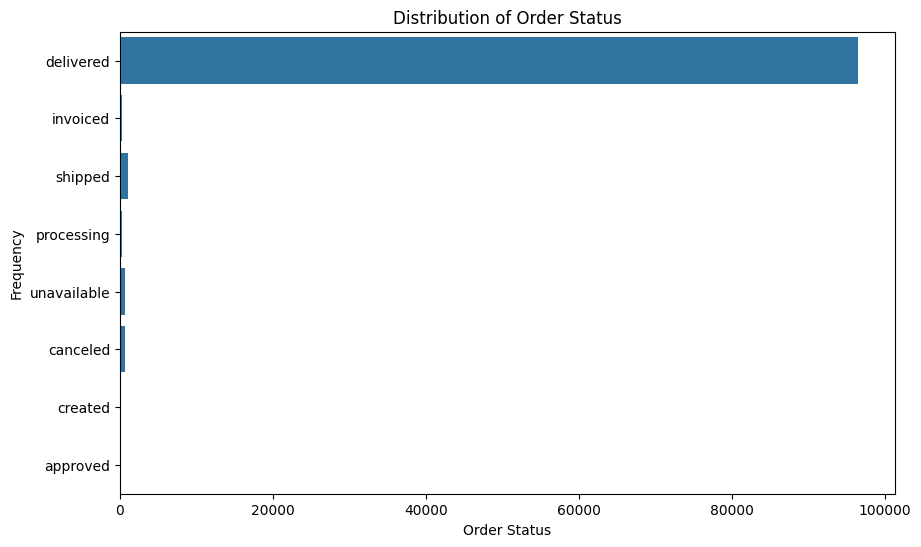

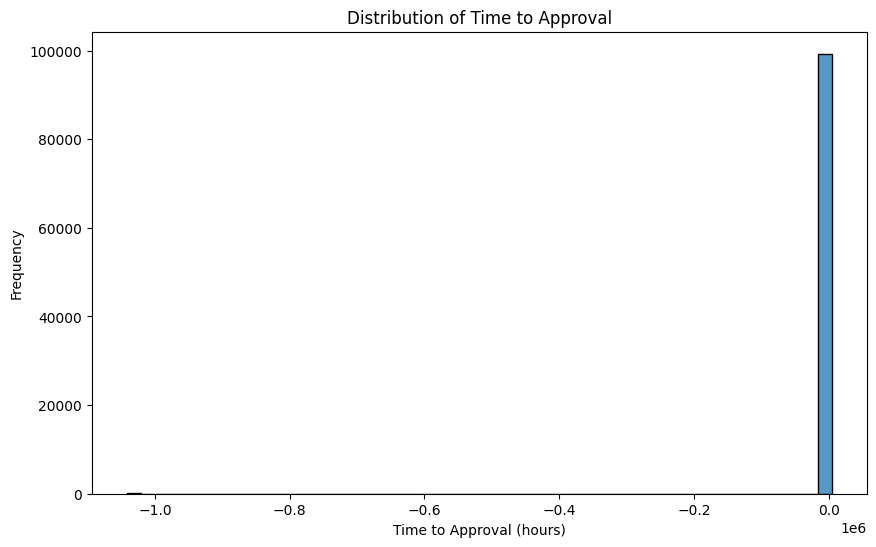

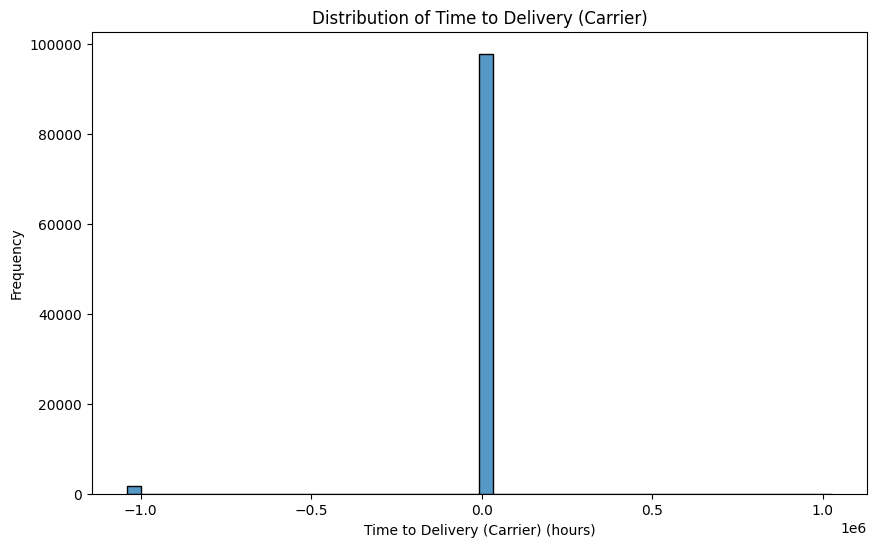

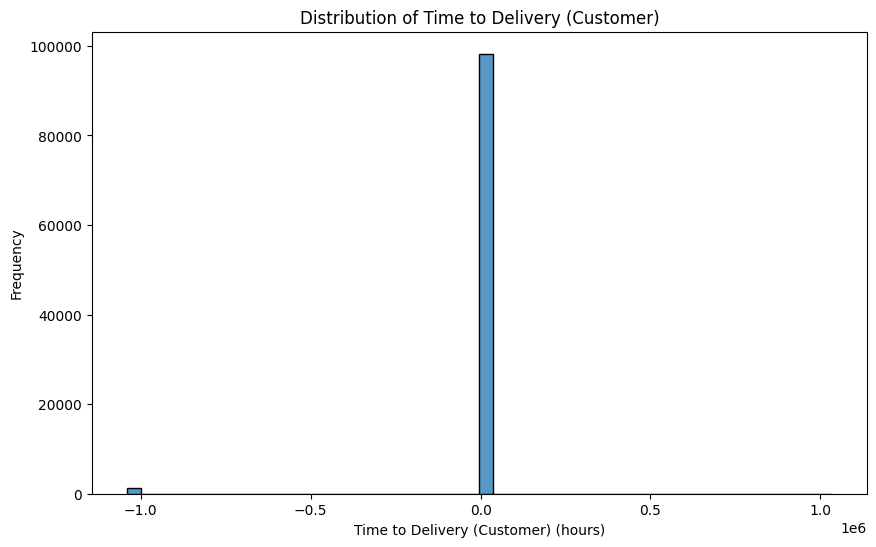

In [40]:
# Plot the distribution of order_status
plt.figure(figsize=(10, 6))
sns.countplot(data2['order_status'])
plt.title('Distribution of Order Status')
plt.xlabel('Order Status')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of time_to_approval
plt.figure(figsize=(10, 6))
sns.histplot(data2['time_to_approval'], bins=50)
plt.title('Distribution of Time to Approval')
plt.xlabel('Time to Approval (hours)')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of time_to_delivery_carrier
plt.figure(figsize=(10, 6))
sns.histplot(data2['time_to_delivery_carrier'], bins=50)
plt.title('Distribution of Time to Delivery (Carrier)')
plt.xlabel('Time to Delivery (Carrier) (hours)')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of time_to_delivery_customer
plt.figure(figsize=(10, 6))
sns.histplot(data2['time_to_delivery_customer'], bins=50)
plt.title('Distribution of Time to Delivery (Customer)')
plt.xlabel('Time to Delivery (Customer) (hours)')
plt.ylabel('Frequency')
plt.show()

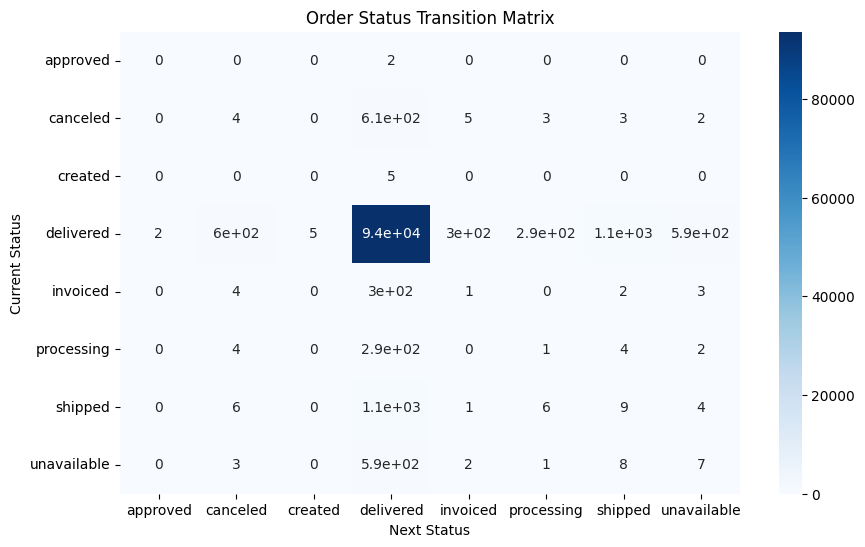

In [41]:
# Create a transition matrix
transition_matrix = pd.crosstab(data2['order_status'], data2['order_status'].shift(1))

# Plot the transition matrix
plt.figure(figsize=(10, 6))
sns.heatmap(transition_matrix, annot=True, cmap='Blues')
plt.title('Order Status Transition Matrix')
plt.xlabel('Next Status')
plt.ylabel('Current Status')
plt.show()

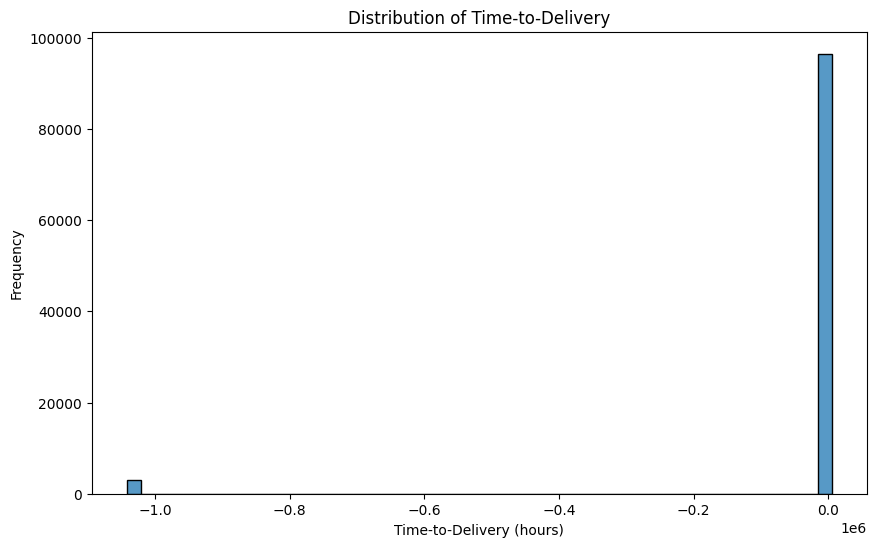

In [42]:
# Calculate time-to-event (e.g., time-to-delivery)
data2['time_to_delivery'] = (data2['order_delivered_customer_date'] - data2['order_purchase_timestamp']).dt.total_seconds() / 3600

# Plot the distribution of time-to-event
plt.figure(figsize=(10, 6))
sns.histplot(data2['time_to_delivery'], bins=50)
plt.title('Distribution of Time-to-Delivery')
plt.xlabel('Time-to-Delivery (hours)')
plt.ylabel('Frequency')
plt.show()

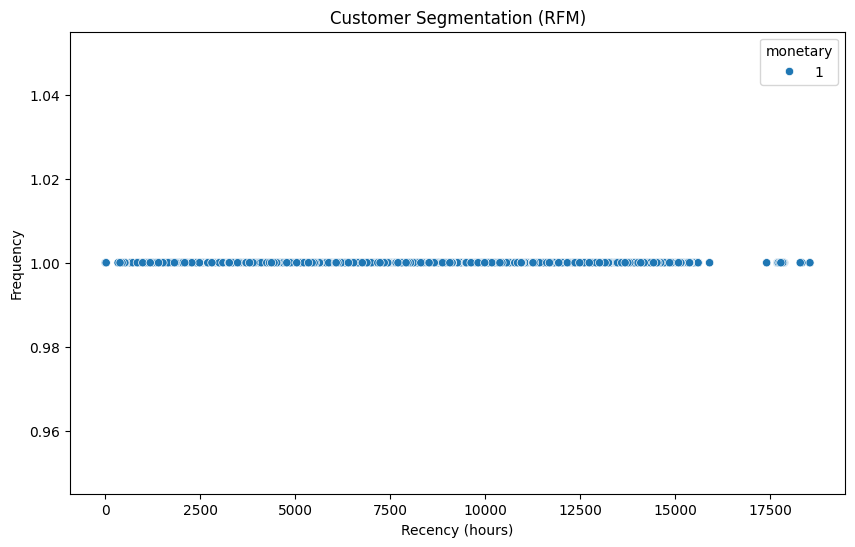

In [43]:
# Calculate customer segmentation metrics (e.g., RFM)
data2['recency'] = (data2['order_purchase_timestamp'].max() - data2['order_purchase_timestamp']).dt.total_seconds() / 3600
data2['frequency'] = data2.groupby('customer_id')['order_id'].transform('count')
data2['monetary'] = data2.groupby('customer_id')['order_id'].transform('size')

# Plot the distribution of customer segmentation metrics
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data2['recency'], y=data2['frequency'], hue=data2['monetary'])
plt.title('Customer Segmentation (RFM)')
plt.xlabel('Recency (hours)')
plt.ylabel('Frequency')
plt.show()

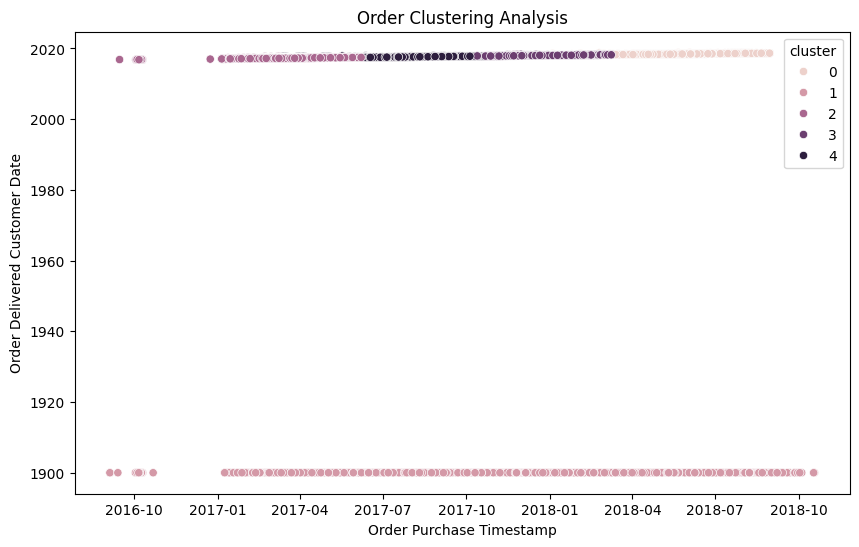

In [44]:
# Calculate order clustering metrics (e.g., k-means)
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)
data2['cluster'] = kmeans.fit_predict(data2[['order_purchase_timestamp', 'order_delivered_customer_date']])

# Plot the distribution of order clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data2['order_purchase_timestamp'], y=data2['order_delivered_customer_date'], hue=data2['cluster'])
plt.title('Order Clustering Analysis')
plt.xlabel('Order Purchase Timestamp')
plt.ylabel('Order Delivered Customer Date')
plt.show()

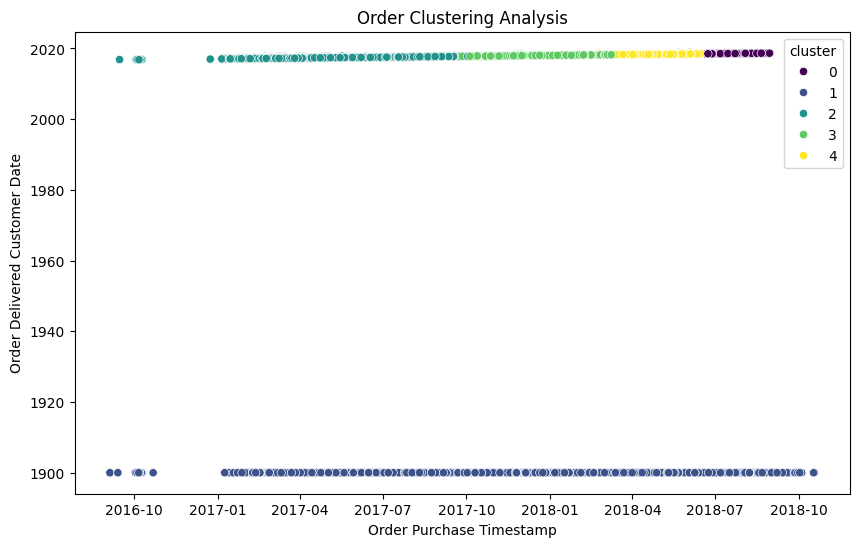

In [45]:
# Calculate order clustering metrics (e.g., k-means)
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)
data2['cluster'] = kmeans.fit_predict(data2[['order_purchase_timestamp', 'order_delivered_customer_date']])

# Plot the distribution of order clusters with distinct colors
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data2['order_purchase_timestamp'], y=data2['order_delivered_customer_date'],
                hue=data2['cluster'], palette='viridis')  # Add palette='viridis'
plt.title('Order Clustering Analysis')
plt.xlabel('Order Purchase Timestamp')
plt.ylabel('Order Delivered Customer Date')
plt.show()

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

In [49]:
# Load the dataset
data3 = pd.read_csv('olist_products_dataset.csv')

# Display the first few rows of the dataset
print(data3.head())

                         product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   
3                 27.0                       261.0                 1.0   
4                 37.0                       402.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  
0             225.0               16.0               10.0              14.0  
1            1000.0       

In [54]:
# Handle missing values in categorical columns
categorical_columns = ['product_category_name']
data3[categorical_columns] = data3[categorical_columns].fillna('Unknown')
# Handle missing values in numerical columns
numerical_columns = ['product_weight_g', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_length_cm', 'product_height_cm', 'product_width_cm']
imputer = SimpleImputer(strategy='mean')
data3[numerical_columns] = imputer.fit_transform(data3[numerical_columns]).astype(int)

In [55]:
print(data3.isnull().sum())

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64


In [56]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   product_id                  32951 non-null  object
 1   product_category_name       32951 non-null  object
 2   product_name_lenght         32951 non-null  int64 
 3   product_description_lenght  32951 non-null  int64 
 4   product_photos_qty          32951 non-null  int64 
 5   product_weight_g            32951 non-null  int64 
 6   product_length_cm           32951 non-null  int64 
 7   product_height_cm           32951 non-null  int64 
 8   product_width_cm            32951 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 2.3+ MB


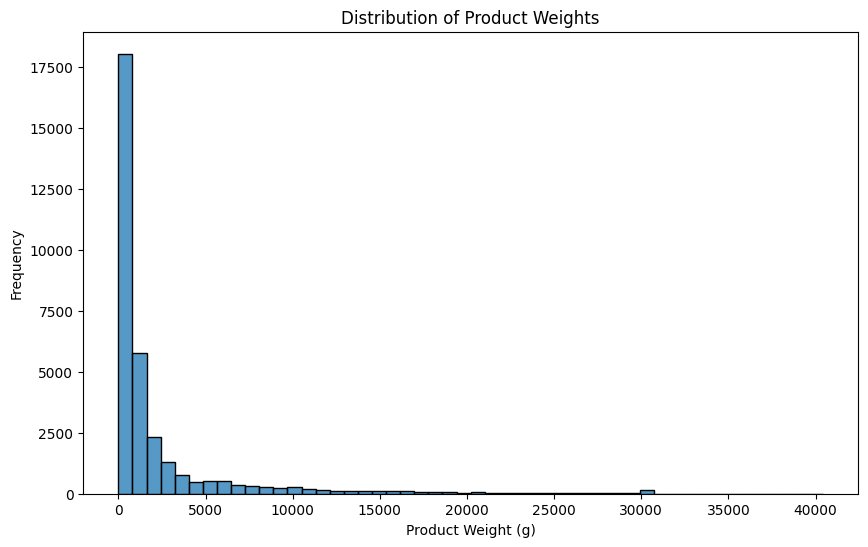

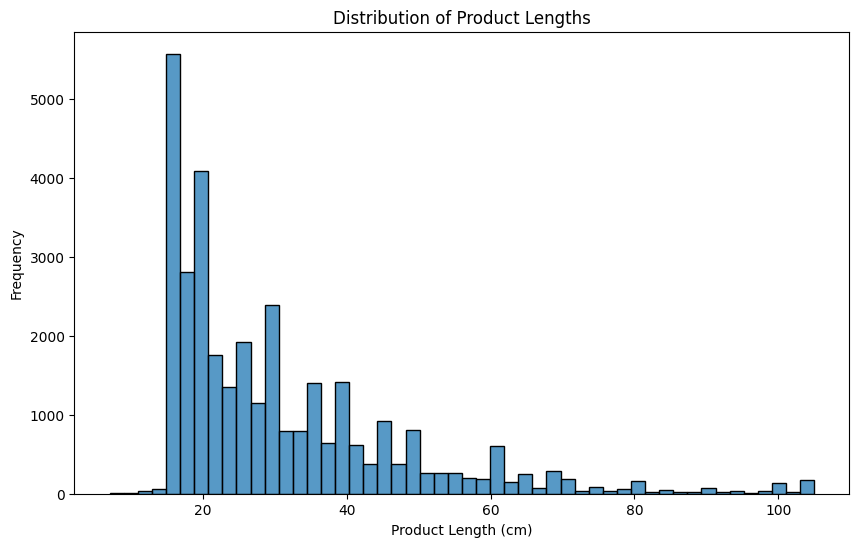

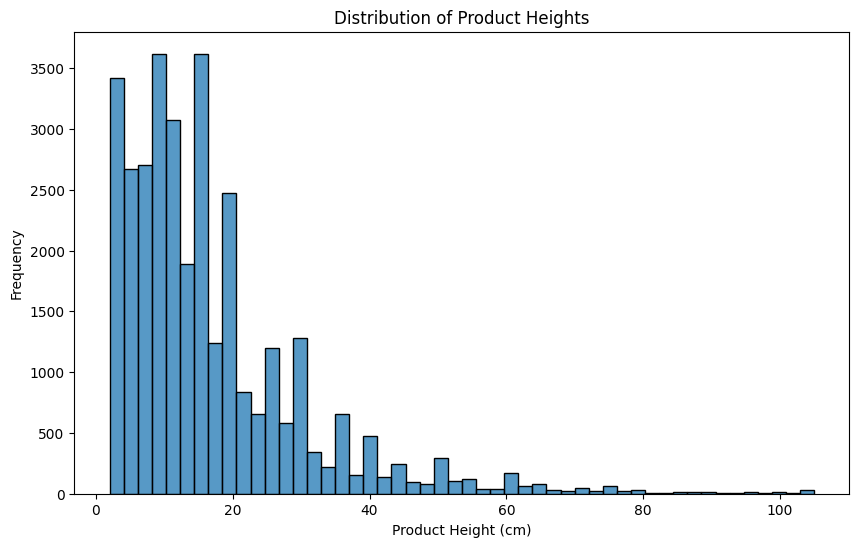

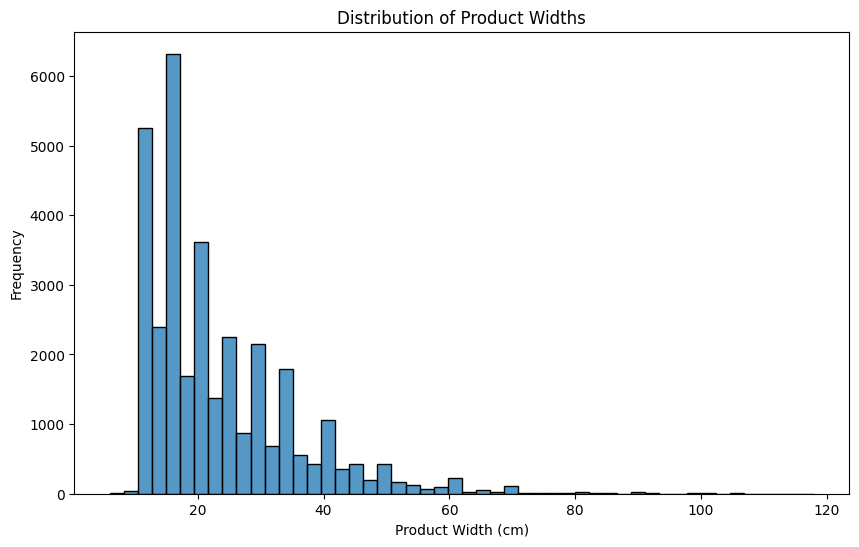

In [58]:
# Plot the distribution of product weights
plt.figure(figsize=(10, 6))
sns.histplot(data3['product_weight_g'], bins=50)
plt.title('Distribution of Product Weights')
plt.xlabel('Product Weight (g)')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of product lengths
plt.figure(figsize=(10, 6))
sns.histplot(data3['product_length_cm'], bins=50)
plt.title('Distribution of Product Lengths')
plt.xlabel('Product Length (cm)')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of product heights
plt.figure(figsize=(10, 6))
sns.histplot(data3['product_height_cm'], bins=50)
plt.title('Distribution of Product Heights')
plt.xlabel('Product Height (cm)')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of product widths
plt.figure(figsize=(10, 6))
sns.histplot(data3['product_width_cm'], bins=50)
plt.title('Distribution of Product Widths')
plt.xlabel('Product Width (cm)')
plt.ylabel('Frequency')
plt.show()


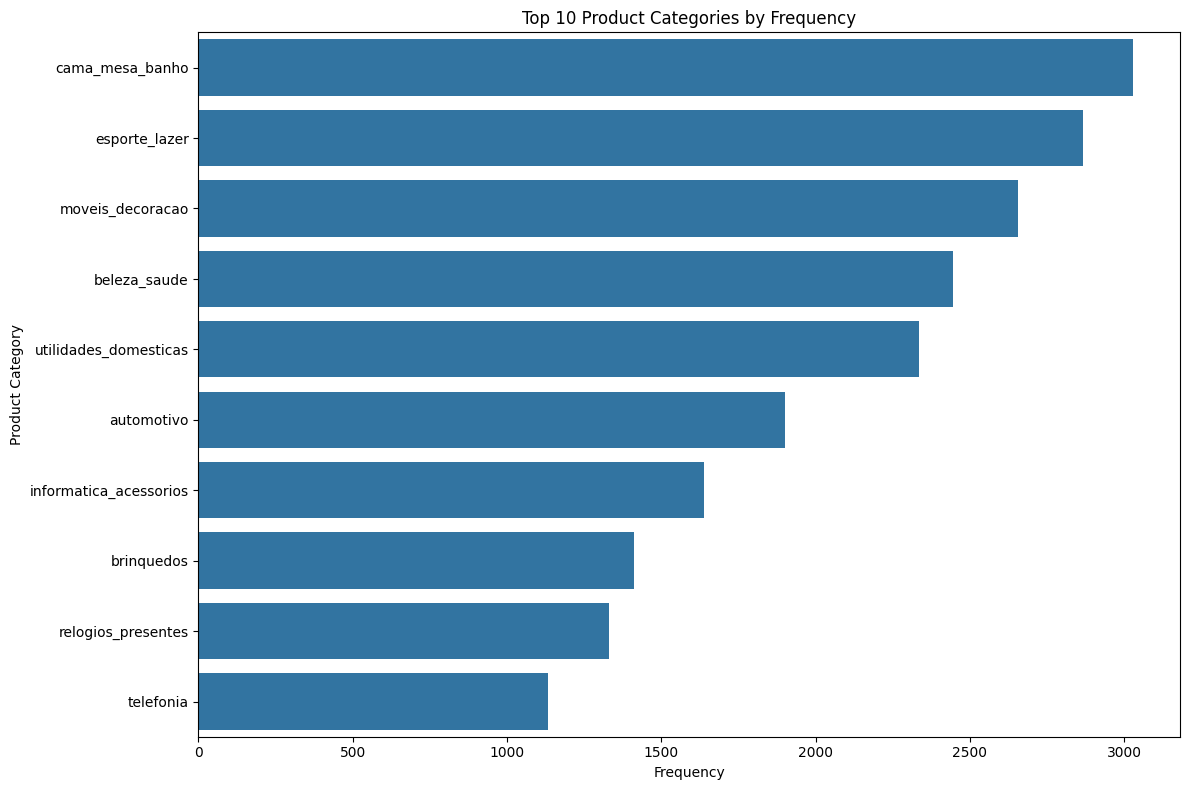

Top 10 Product Categories:
product_category_name
cama_mesa_banho           3029
esporte_lazer             2867
moveis_decoracao          2657
beleza_saude              2444
utilidades_domesticas     2335
automotivo                1900
informatica_acessorios    1639
brinquedos                1411
relogios_presentes        1329
telefonia                 1134
Name: count, dtype: int64


In [59]:
# Plot the distribution of product categories
plt.figure(figsize=(12, 8))
sns.countplot(y=data3['product_category_name'], order=data3['product_category_name'].value_counts().index[:10])
plt.title('Top 10 Product Categories by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Product Category')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Print top 10 categories
print("Top 10 Product Categories:")
print(data3['product_category_name'].value_counts().head(10))

In [60]:
# Define a dictionary to map Portuguese category names to English
category_translations = {
    'cama_mesa_banho': 'Bed, Table and Bath',
    'esporte_lazer': 'Sports and Leisure',
    'moveis_decoracao': 'Furniture and Decoration',
    'beleza_saude': 'Beauty and Health',
    'utilidades_domesticas': 'Household Essentials',
    'automotivo': 'Automotive',
    'informatica_acessorios': 'Computer and Accessories',
    'brinquedos': 'Toys',
    'relogios_presentes': 'Watches and Gifts',
    'telefonia': 'Telephony'
}

# Convert top 10 categories to English
top_categories_english = [category_translations[category] for category in data3['product_category_name'].value_counts().index[:10]]

# Print top 10 categories in English
print("Top 10 Product Categories in English:")
print(top_categories_english)

Top 10 Product Categories in English:
['Bed, Table and Bath', 'Sports and Leisure', 'Furniture and Decoration', 'Beauty and Health', 'Household Essentials', 'Automotive', 'Computer and Accessories', 'Toys', 'Watches and Gifts', 'Telephony']


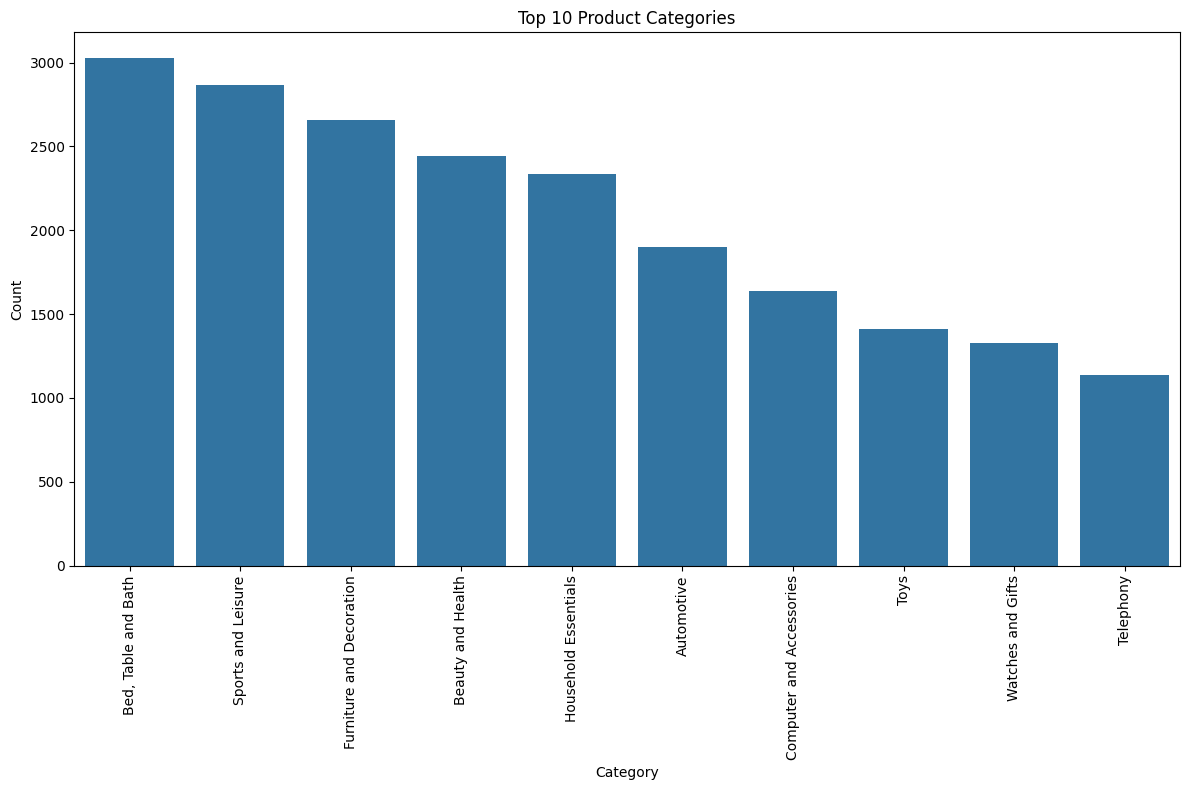

In [61]:
# Define a dictionary to map Portuguese category names to English
category_translations = {
    'cama_mesa_banho': 'Bed, Table and Bath',
    'esporte_lazer': 'Sports and Leisure',
    'moveis_decoracao': 'Furniture and Decoration',
    'beleza_saude': 'Beauty and Health',
    'utilidades_domesticas': 'Household Essentials',
    'automotivo': 'Automotive',
    'informatica_acessorios': 'Computer and Accessories',
    'brinquedos': 'Toys',
    'relogios_presentes': 'Watches and Gifts',
    'telefonia': 'Telephony'
}

# Convert top 10 categories to English
top_categories_english = [category_translations[category] for category in data3['product_category_name'].value_counts().index[:10]]

# Get the corresponding counts
top_categories_counts = data3['product_category_name'].value_counts().head(10).values

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=top_categories_english, y=top_categories_counts)
plt.title('Top 10 Product Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

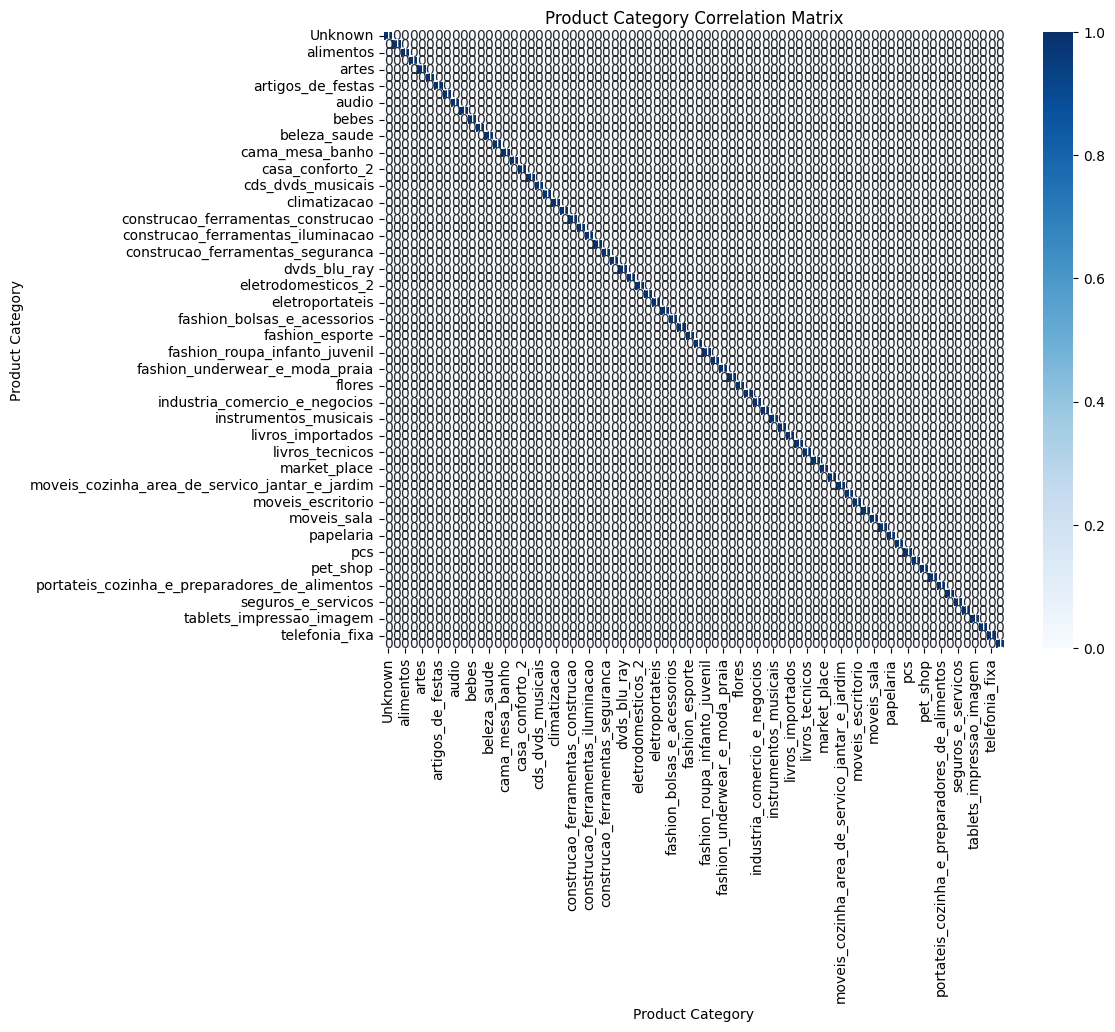

In [62]:
# Calculate correlation between product categories
category_correlation = pd.crosstab(data3['product_category_name'], data3['product_category_name']).apply(lambda x: x/x.sum(), axis=1)

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(category_correlation, annot=True, cmap='Blues')
plt.title('Product Category Correlation Matrix')
plt.xlabel('Product Category')
plt.ylabel('Product Category')
plt.show()

<ipython-input-63-4558efd75979>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  seasonal_demand = data2.groupby(pd.Grouper(key='order_purchase_timestamp', freq='M'))['order_id'].count()


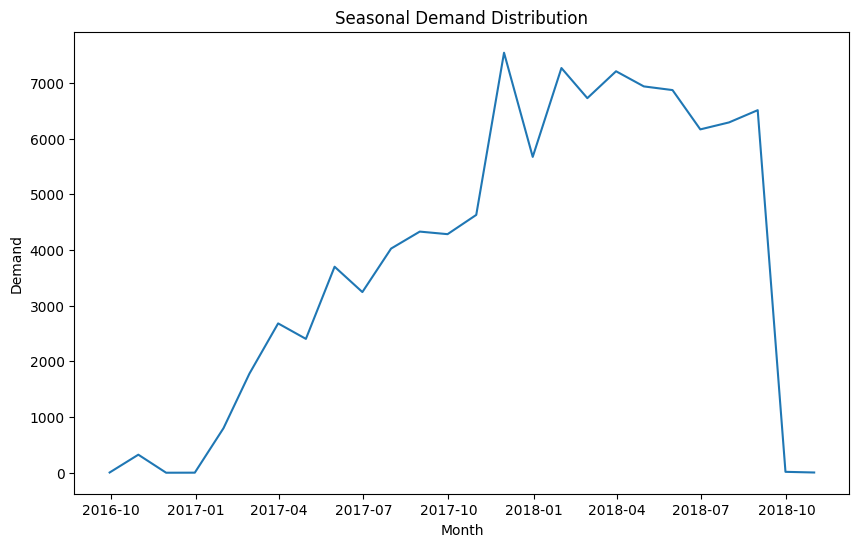

In [63]:
# Calculate seasonal demand
seasonal_demand = data2.groupby(pd.Grouper(key='order_purchase_timestamp', freq='M'))['order_id'].count()

# Plot the seasonal demand distribution
plt.figure(figsize=(10, 6))
sns.lineplot(x=seasonal_demand.index, y=seasonal_demand.values)
plt.title('Seasonal Demand Distribution')
plt.xlabel('Month')
plt.ylabel('Demand')
plt.show()

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [66]:
# Load the dataset
data4 = pd.read_csv('olist_geolocation_dataset.csv')

# Display the first few rows of the dataset
print(data4.head())

   geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037       -23.545621       -46.639292   
1                         1046       -23.546081       -46.644820   
2                         1046       -23.546129       -46.642951   
3                         1041       -23.544392       -46.639499   
4                         1035       -23.541578       -46.641607   

  geolocation_city geolocation_state  
0        sao paulo                SP  
1        sao paulo                SP  
2        sao paulo                SP  
3        sao paulo                SP  
4        sao paulo                SP  


geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64
       geolocation_zip_code_prefix  geolocation_lat  geolocation_lng
count                 1.000163e+06     1.000163e+06     1.000163e+06
mean                  3.657417e+04    -2.117615e+01    -4.639054e+01
std                   3.054934e+04     5.715866e+00     4.269748e+00
min                   1.001000e+03    -3.660537e+01    -1.014668e+02
25%                   1.107500e+04    -2.360355e+01    -4.857317e+01
50%                   2.653000e+04    -2.291938e+01    -4.663788e+01
75%                   6.350400e+04    -1.997962e+01    -4.376771e+01
max                   9.999000e+04     4.506593e+01     1.211054e+02


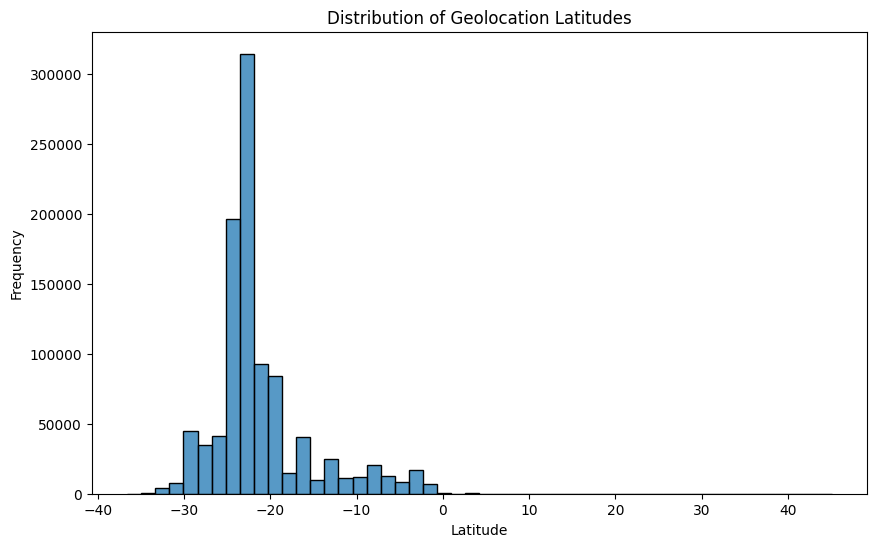

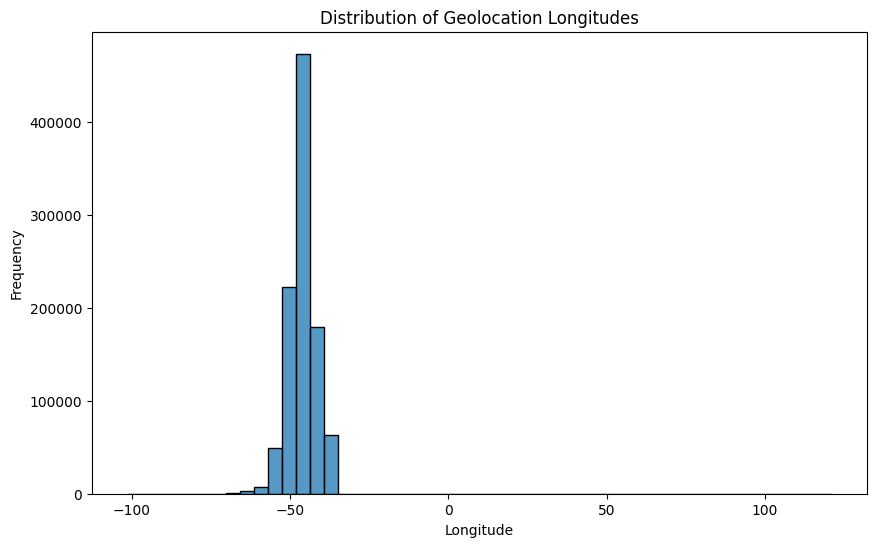

In [67]:
# Check for missing values
print(data4.isnull().sum())

# Get summary statistics
print(data4.describe())

# Plot the distribution of geolocation latitudes
plt.figure(figsize=(10, 6))
sns.histplot(data4['geolocation_lat'], bins=50)
plt.title('Distribution of Geolocation Latitudes')
plt.xlabel('Latitude')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of geolocation longitudes
plt.figure(figsize=(10, 6))
sns.histplot(data4['geolocation_lng'], bins=50)
plt.title('Distribution of Geolocation Longitudes')
plt.xlabel('Longitude')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Create a Folium map
m = folium.Map(location=[-23.54562128, -46.63929205], zoom_start=10)

# Add markers to the map
for index, row in data4.iterrows():
    folium.Marker([row['geolocation_lat'], row['geolocation_lng']], popup=row['geolocation_city']).add_to(m)

# Display the map
m

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
data4 = pd.read_csv('olist_order_items_dataset.csv')

# Display the first few rows of the dataset
print(data4.head())

                           order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  
0  2017-09-19 09:45:35   58.90          13.29  
1  2017-05-03 11:05:13  239.90          19.93  
2  2018-01-18 14:48:30  199.00          17.87  
3  2018-08-15 10:10:18   12.99          12.7

       order_item_id          price  freight_value
count  112650.000000  112650.000000  112650.000000
mean        1.197834     120.653739      19.990320
std         0.705124     183.633928      15.806405
min         1.000000       0.850000       0.000000
25%         1.000000      39.900000      13.080000
50%         1.000000      74.990000      16.260000
75%         1.000000     134.900000      21.150000
max        21.000000    6735.000000     409.680000


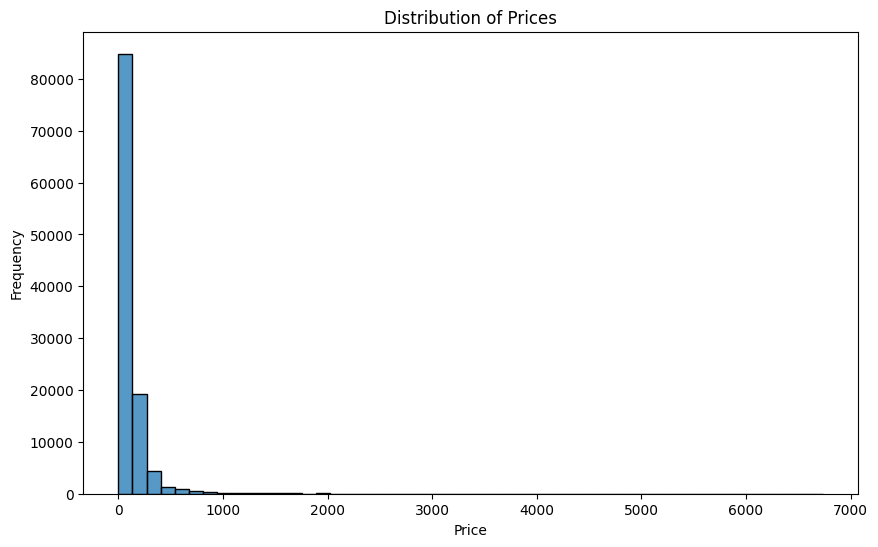

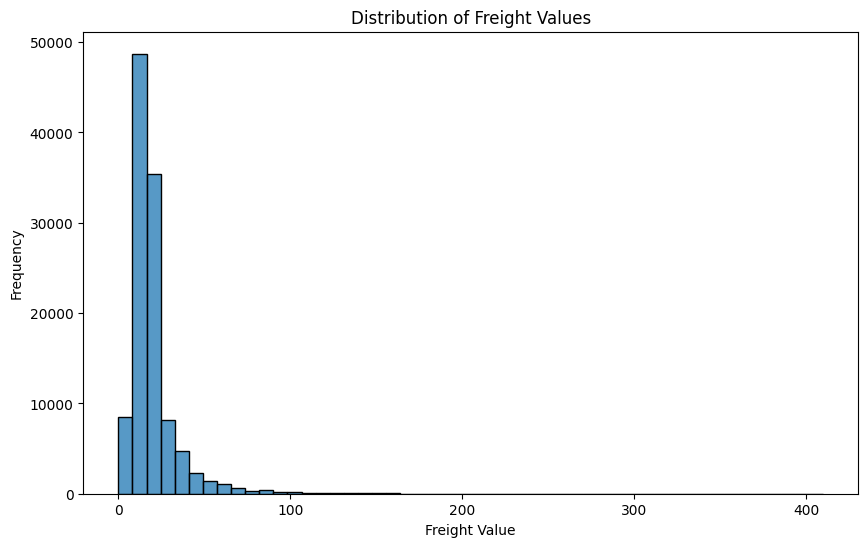

In [3]:
# Get summary statistics
print(data4.describe())

# Plot the distribution of prices
plt.figure(figsize=(10, 6))
sns.histplot(data4['price'], bins=50)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of freight values
plt.figure(figsize=(10, 6))
sns.histplot(data4['freight_value'], bins=50)
plt.title('Distribution of Freight Values')
plt.xlabel('Freight Value')
plt.ylabel('Frequency')
plt.show()

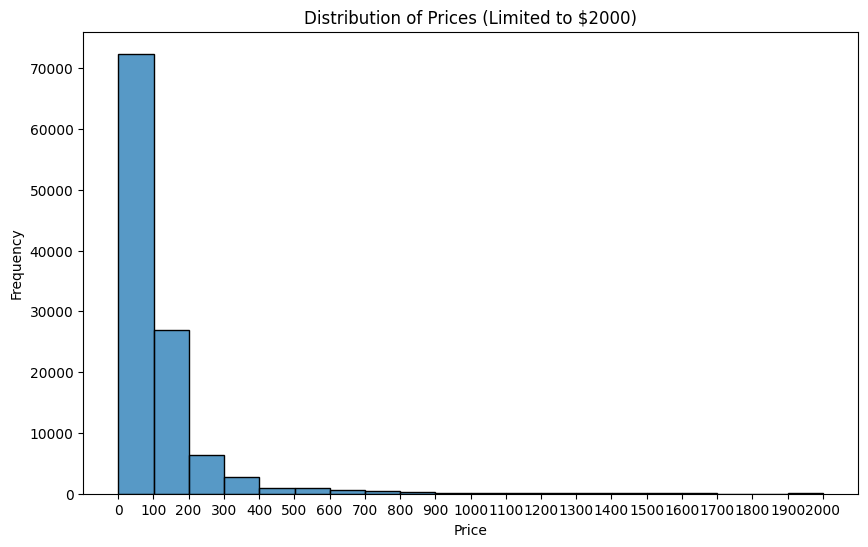

In [4]:
# Plot the distribution of prices with limit and custom labels
plt.figure(figsize=(10, 6))
sns.histplot(data4[data4['price'] <= 2000]['price'], bins=20)
plt.title('Distribution of Prices (Limited to $2000)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.xticks(range(0, 2001, 100))  # Set custom x-axis ticks
plt.show()

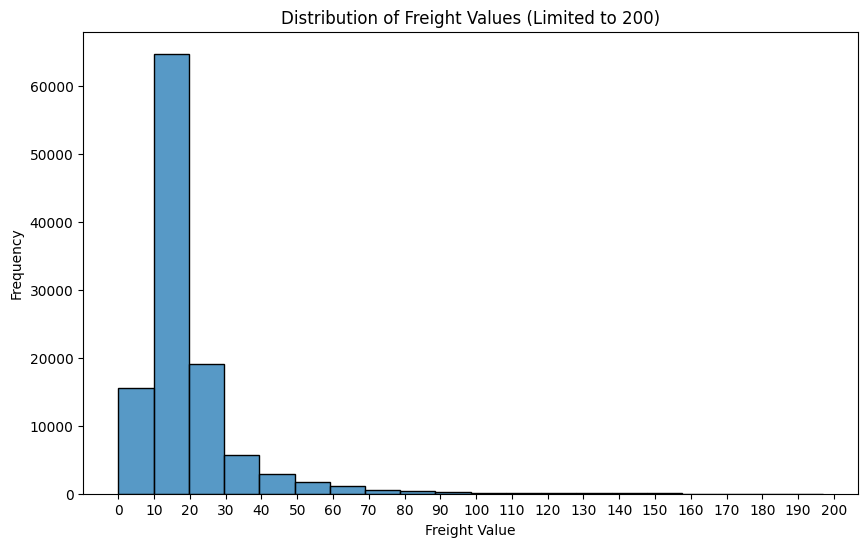

In [5]:
# Plot the distribution of freight values with limit and custom labels
plt.figure(figsize=(10, 6))
sns.histplot(data4[data4['freight_value'] <= 200]['freight_value'], bins=20)
plt.title('Distribution of Freight Values (Limited to 200)')
plt.xlabel('Freight Value')
plt.ylabel('Frequency')
plt.xticks(range(0, 201, 10))  # Set custom x-axis ticks
plt.show()

In [8]:
# Create a product recommendation engine using collaborative filtering
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import Reader  # Import the Reader class

# Define the rating scale
reader = Reader(rating_scale=(1, 5))  # Create a Reader object

# Load the data using the Reader object
data = Dataset.load_from_df(data4[['order_id', 'product_id', 'price']], reader=reader)

# Build the recommendation engine
sim_options = {'name': 'pearson_baseline', 'user_based': False}
algo = KNNWithMeans(sim_options=sim_options)

# Train the recommendation engine
trainset = data.build_full_trainset()
algo.fit(trainset)

# Make predictions
predictions = algo.test(trainset.build_testset())

# Print the top 10 recommended products for a given order
order_id = 12345
recommended_products = algo.get_neighbors(order_id, k=10)
print(recommended_products)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [12]:
# Create a product recommendation engine using collaborative filtering
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import Reader
from surprise import accuracy

# Define the rating scale
reader = Reader(rating_scale=(1, 5))

# Load the data using the Reader object
data = Dataset.load_from_df(data4[['order_id', 'product_id', 'price']], reader=reader)

# Build the recommendation engine
sim_options = {'name': 'pearson_baseline', 'user_based': False}
algo = KNNWithMeans(sim_options=sim_options)

# Train the recommendation engine
trainset = data.build_full_trainset()
algo.fit(trainset)

# Make predictions
testset = trainset.build_testset()
predictions = algo.test(testset)

# Evaluate the recommendation engine
accuracy.rmse(predictions)
accuracy.mae(predictions)

# Get the recommended product IDs for an order that exists in the trainset
# Choose an order_id that is present in your data4 DataFrame
order_id = data4['order_id'].sample(1).iloc[0]  # Select a random order_id from data4

inner_user_id = algo.trainset.to_inner_uid(order_id) # Now this should work as order_id is in the trainset
scores = {}
# Get a list of all raw item IDs from the trainset
all_raw_item_ids = [algo.trainset.to_raw_iid(inner_iid) for inner_iid in algo.trainset.all_items()]

for raw_item_id in all_raw_item_ids: # Iterate over actual raw item IDs
    inner_item_id = algo.trainset.to_inner_iid(raw_item_id)
    score = algo.predict(order_id, raw_item_id).est
    scores[raw_item_id] = score

# Sort the scores in descending order
sorted_scores = sorted(scores.items(), key=lambda x: x[1], reverse=True)

# Print the top 10 recommended product IDs
print("Top 10 Recommended Product IDs:")
for i in range(10):
    print(f"{i+1}. Product ID: {sorted_scores[i][0]}, Score: {sorted_scores[i][1]}")

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 217.0182
MAE:  115.6552
Top 10 Recommended Product IDs:
1. Product ID: 4244733e06e7ecb4970a6e2683c13e61, Score: 5
2. Product ID: e5f2d52b802189ee658865ca93d83a8f, Score: 5
3. Product ID: c777355d18b72b67abbeef9df44fd0fd, Score: 5
4. Product ID: 7634da152a4610f1595efa32f14722fc, Score: 5
5. Product ID: ac6c3623068f30de03045865e4e10089, Score: 5
6. Product ID: ef92defde845ab8450f9d70c526ef70f, Score: 5
7. Product ID: 8d4f2bb7e93e6710a28f34fa83ee7d28, Score: 5
8. Product ID: 557d850972a7d6f792fd18ae1400d9b6, Score: 5
9. Product ID: 310ae3c140ff94b03219ad0adc3c778f, Score: 5
10. Product ID: 4535b0e1091c278dfd193e5a1d63b39f, Score: 5


In [6]:
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import Reader

# Define the rating scale
reader = Reader(rating_scale=(1, 5))

# Load the data using the Reader object
data = Dataset.load_from_df(data4[['order_id', 'product_id', 'price']], reader=reader)

# Build the recommendation engine
sim_options = {'name': 'pearson_baseline', 'user_based': False}  # Item-based collaborative filtering
algo = KNNWithMeans(sim_options=sim_options)

# Train the recommendation engine
trainset = data.build_full_trainset()
algo.fit(trainset)

# Function to get top N recommendations for an order ID
def get_top_n_recommendations(order_id, n=10):
    """
    Returns the top N recommended product IDs for a given order ID.

    Args:
        order_id: The order ID for which to generate recommendations.
        n: The number of recommendations to generate (default is 10).

    Returns:
        A list of tuples containing the recommended product IDs and their estimated scores.
    """

    # Ensure order_id is in the trainset
    if order_id not in data4['order_id'].values:
        raise ValueError(f"Order ID {order_id} not found in the dataset.")

    scores = {}
    # Get a list of all raw item IDs from the trainset
    all_raw_item_ids = [algo.trainset.to_raw_iid(inner_iid) for inner_iid in algo.trainset.all_items()]

    for raw_item_id in all_raw_item_ids:  # Iterate over actual raw item IDs
        score = algo.predict(order_id, raw_item_id).est
        scores[raw_item_id] = score

    # Sort the scores in descending order
    sorted_scores = sorted(scores.items(), key=lambda x: x[1], reverse=True)

    # Return the top N recommendations
    return sorted_scores[:n]


# Example usage:
order_id_to_recommend = 'e4805728ef2799ec455a63ddd08aa52e'  # Replace with the desired order ID from your dataset
recommendations = get_top_n_recommendations(order_id_to_recommend, n=10)

print(f"Top 10 Recommendations for Order ID {order_id_to_recommend}:")
for i, (product_id, score) in enumerate(recommendations):
    print(f"{i+1}. Product ID: {product_id}, Score: {score}")

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Top 10 Recommendations for Order ID e4805728ef2799ec455a63ddd08aa52e:
1. Product ID: 4244733e06e7ecb4970a6e2683c13e61, Score: 5
2. Product ID: e5f2d52b802189ee658865ca93d83a8f, Score: 5
3. Product ID: c777355d18b72b67abbeef9df44fd0fd, Score: 5
4. Product ID: 7634da152a4610f1595efa32f14722fc, Score: 5
5. Product ID: ac6c3623068f30de03045865e4e10089, Score: 5
6. Product ID: ef92defde845ab8450f9d70c526ef70f, Score: 5
7. Product ID: 8d4f2bb7e93e6710a28f34fa83ee7d28, Score: 5
8. Product ID: 557d850972a7d6f792fd18ae1400d9b6, Score: 5
9. Product ID: 310ae3c140ff94b03219ad0adc3c778f, Score: 5
10. Product ID: 4535b0e1091c278dfd193e5a1d63b39f, Score: 5


In [15]:
order_id_to_recommend = 'fffb9224b6fc7c43ebb0904318b10b5f'  # Replace with the desired order ID from your dataset
recommendations = get_top_n_recommendations(order_id_to_recommend, n=10)

print(f"Top 10 Recommendations for Order ID {order_id_to_recommend}:")
for i, (product_id, score) in enumerate(recommendations):
    print(f"{i+1}. Product ID: {product_id}, Score: {score}")

Top 10 Recommendations for Order ID fffb9224b6fc7c43ebb0904318b10b5f:
1. Product ID: 4244733e06e7ecb4970a6e2683c13e61, Score: 5
2. Product ID: e5f2d52b802189ee658865ca93d83a8f, Score: 5
3. Product ID: c777355d18b72b67abbeef9df44fd0fd, Score: 5
4. Product ID: 7634da152a4610f1595efa32f14722fc, Score: 5
5. Product ID: ac6c3623068f30de03045865e4e10089, Score: 5
6. Product ID: ef92defde845ab8450f9d70c526ef70f, Score: 5
7. Product ID: 8d4f2bb7e93e6710a28f34fa83ee7d28, Score: 5
8. Product ID: 557d850972a7d6f792fd18ae1400d9b6, Score: 5
9. Product ID: 310ae3c140ff94b03219ad0adc3c778f, Score: 5
10. Product ID: 4535b0e1091c278dfd193e5a1d63b39f, Score: 5


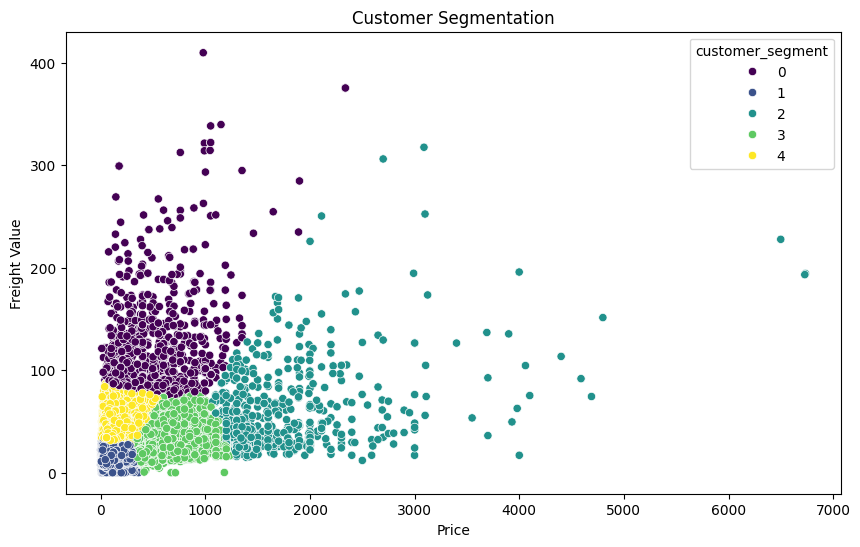

In [19]:
# Perform customer segmentation using k-means clustering
from sklearn.cluster import KMeans

# Select relevant features (excluding 'order_id')
customer_features = data4[['price', 'freight_value']]

# Scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
customer_features_scaled = scaler.fit_transform(customer_features)

# Perform k-means clustering
kmeans = KMeans(n_clusters=5)
customer_segments = kmeans.fit_predict(customer_features_scaled)

# Add the cluster labels to the DataFrame
data4['customer_segment'] = customer_segments

# Plot the customer segments
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='freight_value', hue='customer_segment', data=data4, palette='viridis')
plt.title('Customer Segmentation')
plt.xlabel('Price')
plt.ylabel('Freight Value')
plt.show()

In [20]:
# Perform sales forecasting using ARIMA
from statsmodels.tsa.arima.model import ARIMA

# Select relevant features
sales_data = data4[['order_id', 'price']]

# Convert the data to a time series
sales_ts = sales_data.set_index('order_id')['price']

# Perform ARIMA modeling
model = ARIMA(sales_ts, order=(5,1,0))
model_fit = model.fit()

# Print the forecasted sales
forecast = model_fit.forecast(steps=30)
print(forecast)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a 

112650    154.454680
112651    165.784110
112652    147.063319
112653    113.277821
112654    113.375224
112655    121.861242
112656    135.135508
112657    132.899212
112658    127.732476
112659    124.265480
112660    125.761277
112661    127.765632
112662    128.866535
112663    127.952211
112664    127.124473
112665    126.961431
112666    127.372814
112667    127.651785
112668    127.657609
112669    127.467870
112670    127.379246
112671    127.411702
112672    127.484594
112673    127.507252
112674    127.486655
112675    127.458310
112676    127.454791
112677    127.466241
112678    127.475625
112679    127.474916
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
# Perform sales forecasting using ARIMA
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Select relevant features
sales_data = data4[['order_id', 'price']]

# Convert the data to a time series
sales_ts = sales_data.set_index('order_id')['price']

# Perform ARIMA modeling
model = ARIMA(sales_ts, order=(5,1,0))
model_fit = model.fit()

# Print the forecasted sales
forecast = model_fit.forecast(steps=30)
print(forecast)

# Plot the original time series and the forecast
plt.figure(figsize=(12, 6))
plt.plot(sales_ts, label='Original Time Series')
plt.plot(forecast, label='Forecast', color='red')
plt.title('Sales Forecast using ARIMA')
plt.xlabel('Order ID')
plt.ylabel('Price')
plt.legend()
plt.show()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a 

112650    154.454680
112651    165.784110
112652    147.063319
112653    113.277821
112654    113.375224
112655    121.861242
112656    135.135508
112657    132.899212
112658    127.732476
112659    124.265480
112660    125.761277
112661    127.765632
112662    128.866535
112663    127.952211
112664    127.124473
112665    126.961431
112666    127.372814
112667    127.651785
112668    127.657609
112669    127.467870
112670    127.379246
112671    127.411702
112672    127.484594
112673    127.507252
112674    127.486655
112675    127.458310
112676    127.454791
112677    127.466241
112678    127.475625
112679    127.474916
Name: predicted_mean, dtype: float64


In [8]:
# Evaluate the product recommendation engine using precision, recall, and F1 score
from sklearn.metrics import precision_score, recall_score, f1_score

# Get the predicted ratings
predicted_ratings = algo.test(trainset.build_testset())

# Get the actual ratings and predicted ratings as lists of numerical values
actual_ratings = [rating[2] for rating in trainset.build_testset()]  # Extract actual ratings
predicted_ratings = [pred.est for pred in predicted_ratings]  # Extract predicted ratings

# Convert ratings to binary (1 for positive, 0 for negative)
# You can adjust the threshold as needed
threshold = 3.5  # Example threshold
actual_ratings_binary = [1 if rating >= threshold else 0 for rating in actual_ratings]
predicted_ratings_binary = [1 if rating >= threshold else 0 for rating in predicted_ratings]

# Calculate the precision, recall, and F1 score
precision = precision_score(actual_ratings_binary, predicted_ratings_binary)
recall = recall_score(actual_ratings_binary, predicted_ratings_binary)
f1 = f1_score(actual_ratings_binary, predicted_ratings_binary)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Load the dataset
data5 = pd.read_csv('olist_order_payments_dataset.csv')

# Display the first few rows of the dataset
print(data5.head())

                           order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  
2                     1          65.71  
3                     8         107.78  
4                     2         128.45  


       payment_sequential  payment_installments  payment_value
count       103886.000000         103886.000000  103886.000000
mean             1.092679              2.853349     154.100380
std              0.706584              2.687051     217.494064
min              1.000000              0.000000       0.000000
25%              1.000000              1.000000      56.790000
50%              1.000000              1.000000     100.000000
75%              1.000000              4.000000     171.837500
max             29.000000             24.000000   13664.080000


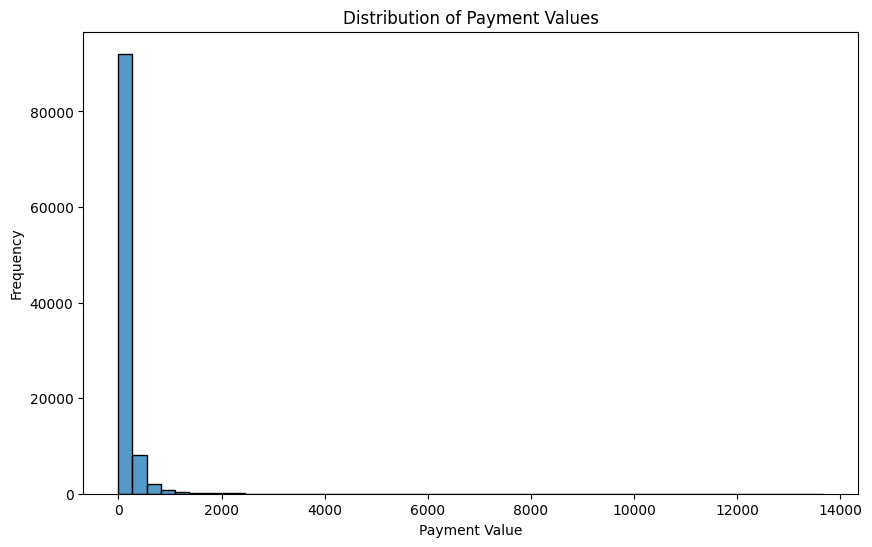

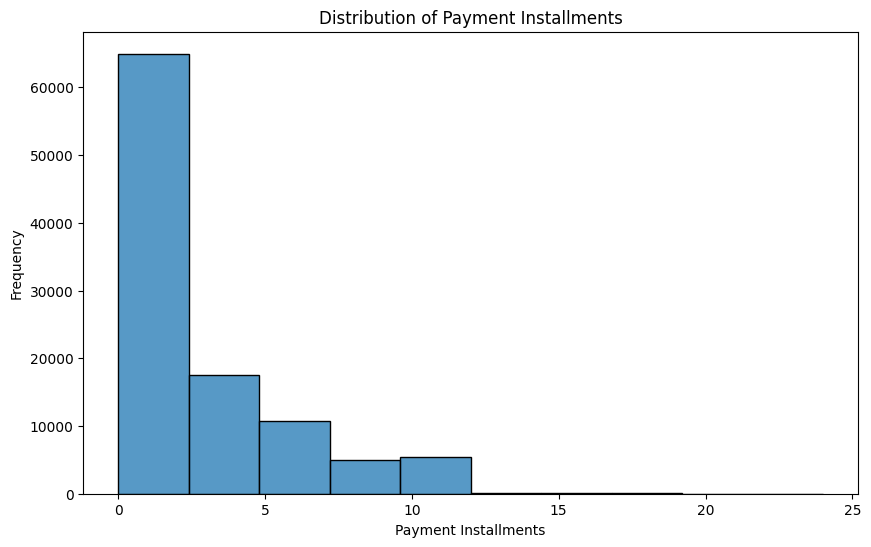

In [11]:
# Get summary statistics
print(data5.describe())

# Plot the distribution of payment values
plt.figure(figsize=(10, 6))
sns.histplot(data5['payment_value'], bins=50)
plt.title('Distribution of Payment Values')
plt.xlabel('Payment Value')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of payment installments
plt.figure(figsize=(10, 6))
sns.histplot(data5['payment_installments'], bins=10)
plt.title('Distribution of Payment Installments')
plt.xlabel('Payment Installments')
plt.ylabel('Frequency')
plt.show()

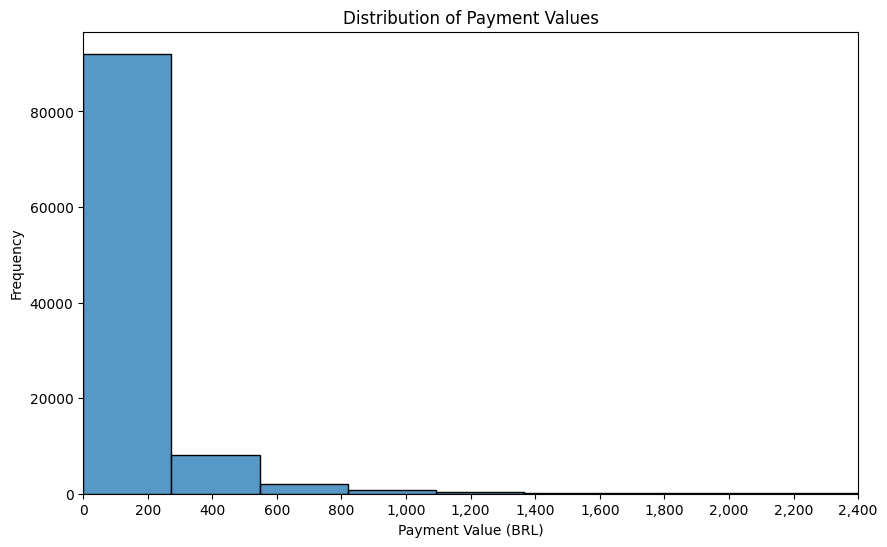

In [14]:
# Plot the distribution of payment values
plt.figure(figsize=(10, 6))
sns.histplot(data5['payment_value'], bins=50)
plt.title('Distribution of Payment Values')
plt.xlabel('Payment Value (BRL)')
plt.ylabel('Frequency')
plt.xlim(0, 300)  # Limit x-axis to 3000
plt.xticks(np.arange(0, 2501, 200))  # Set x-axis ticks every 100
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))  # Format x-axis labels with commas
plt.show()

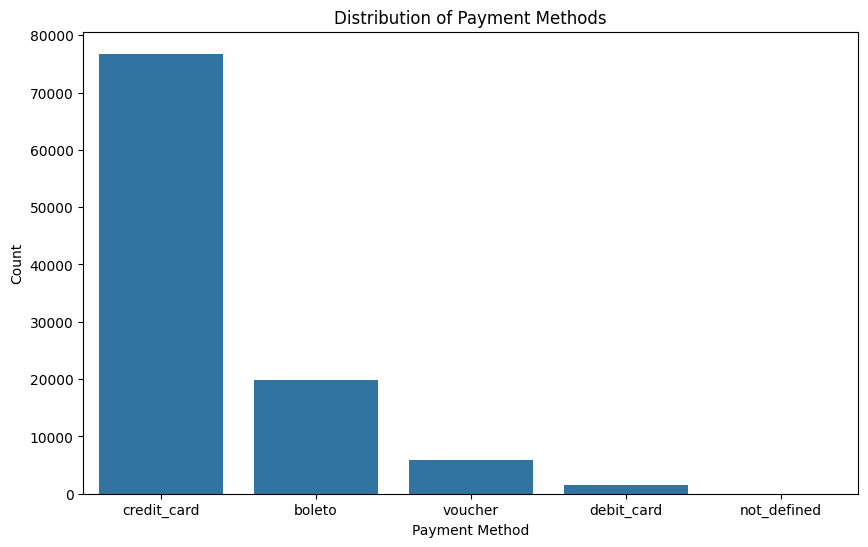

In [15]:
# Plot the distribution of payment methods
plt.figure(figsize=(10, 6))
sns.countplot(x='payment_type', data=data5)
plt.title('Distribution of Payment Methods')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.show()

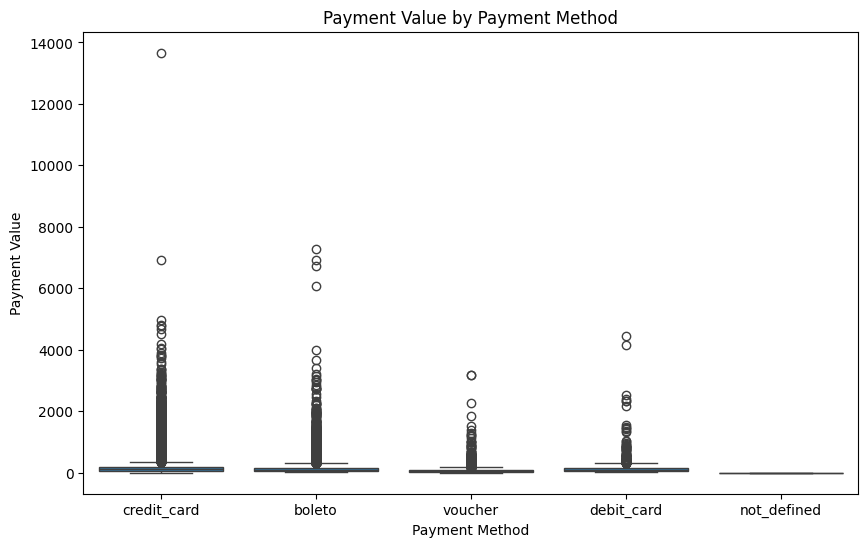

In [16]:
# Plot the payment value by payment method
plt.figure(figsize=(10, 6))
sns.boxplot(x='payment_type', y='payment_value', data=data5)
plt.title('Payment Value by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Payment Value')
plt.show()

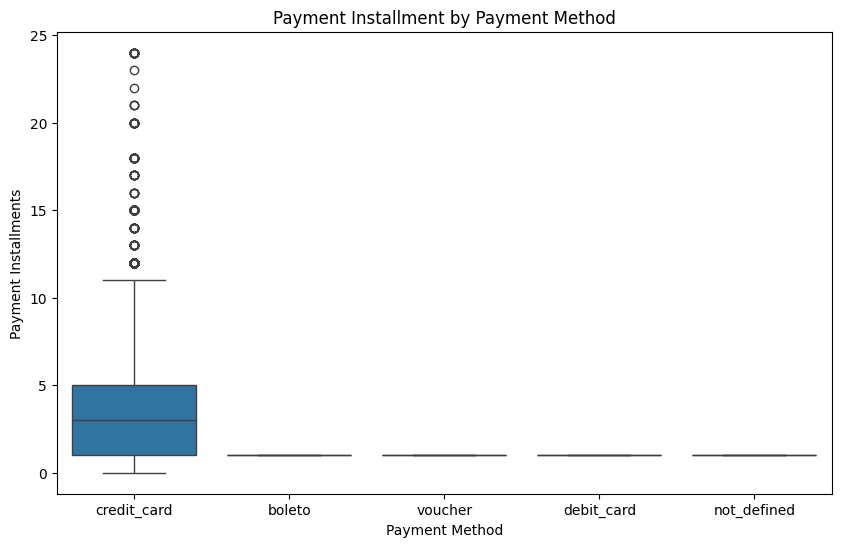

In [17]:
# Plot the payment installment by payment method
plt.figure(figsize=(10, 6))
sns.boxplot(x='payment_type', y='payment_installments', data=data5)
plt.title('Payment Installment by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Payment Installments')
plt.show()

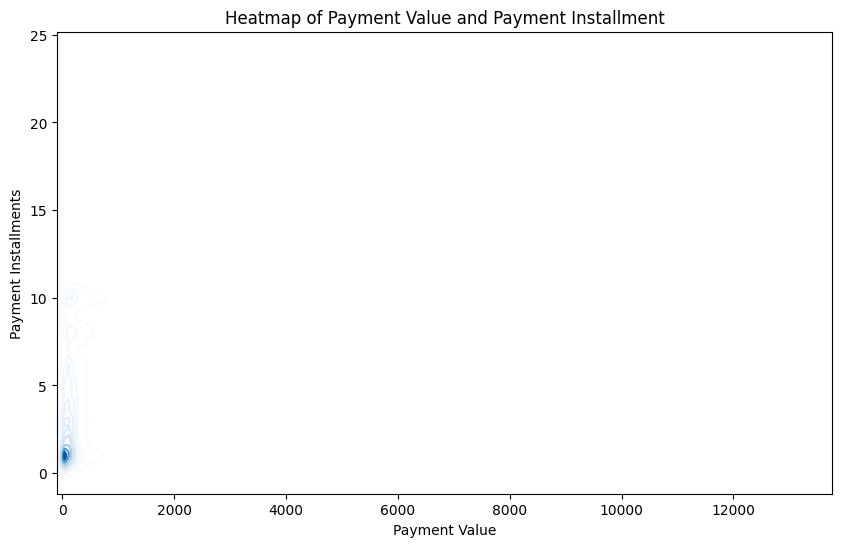

In [18]:
# Plot the heatmap of payment value and payment installment
plt.figure(figsize=(10, 6))
sns.kdeplot(x='payment_value', y='payment_installments', data=data5, cmap='Blues')
plt.title('Heatmap of Payment Value and Payment Installment')
plt.xlabel('Payment Value')
plt.ylabel('Payment Installments')
plt.show()

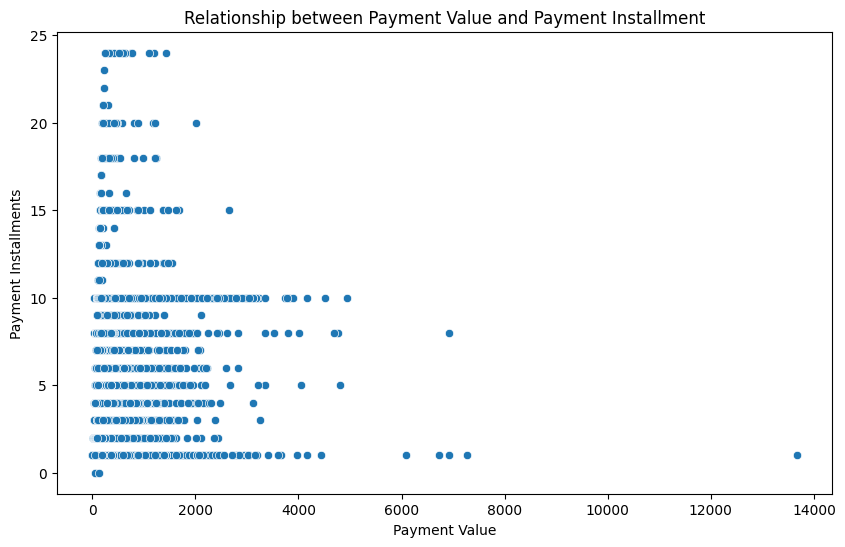

In [19]:
# Plot the relationship between payment value and payment installment
plt.figure(figsize=(10, 6))
sns.scatterplot(x='payment_value', y='payment_installments', data=data5)
plt.title('Relationship between Payment Value and Payment Installment')
plt.xlabel('Payment Value')
plt.ylabel('Payment Installments')
plt.show()

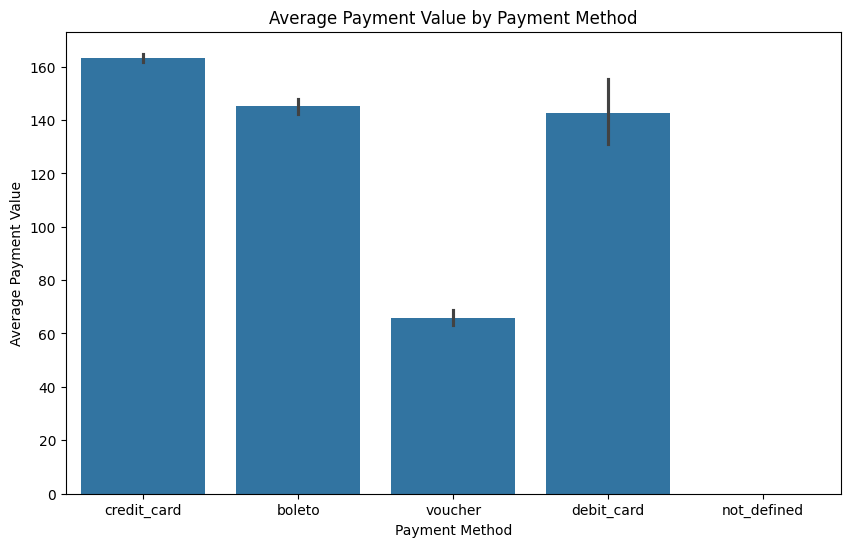

In [20]:
# Plot the average payment value by payment method
plt.figure(figsize=(10, 6))
sns.barplot(x='payment_type', y='payment_value', data=data5, estimator=np.mean)
plt.title('Average Payment Value by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Average Payment Value')
plt.show()

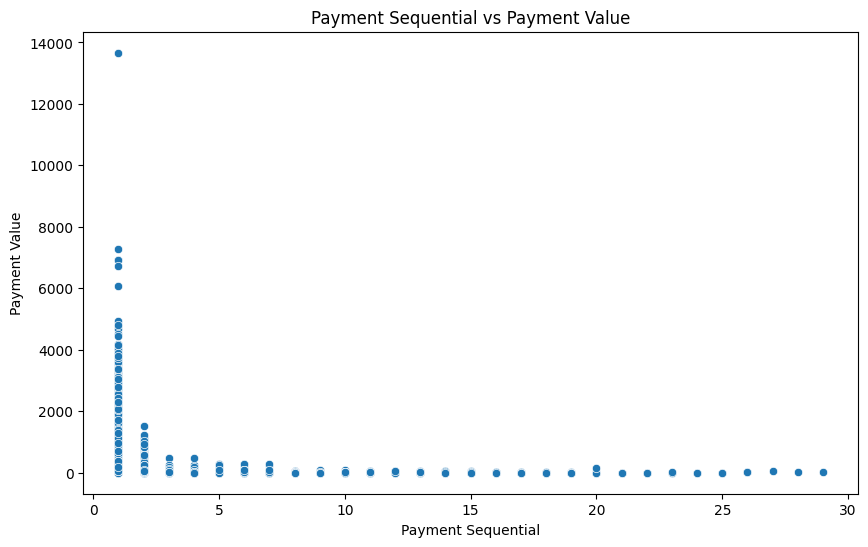

In [21]:
# Plot payment_sequential vs payment_value
plt.figure(figsize=(10, 6))
sns.scatterplot(x='payment_sequential', y='payment_value', data=data5)
plt.title('Payment Sequential vs Payment Value')
plt.xlabel('Payment Sequential')
plt.ylabel('Payment Value')
plt.show()

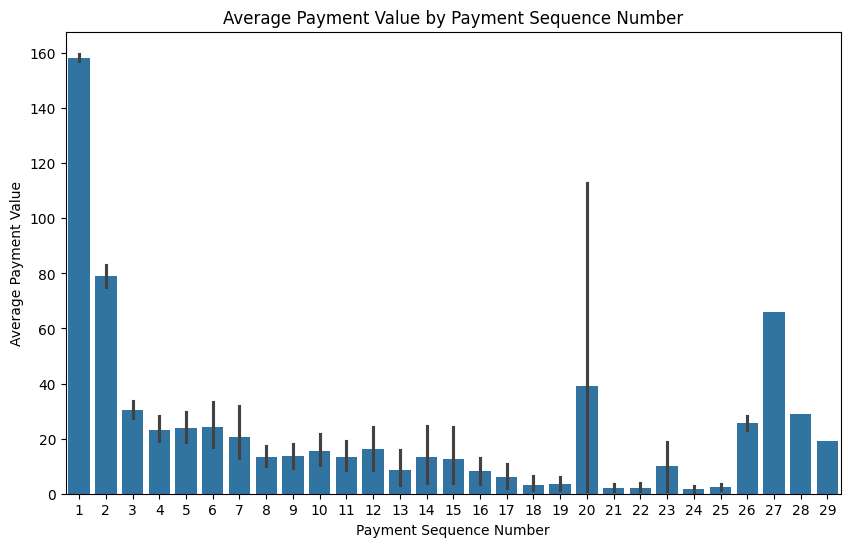

In [22]:
# Plot average payment value by payment sequence number
plt.figure(figsize=(10, 6))
sns.barplot(x='payment_sequential', y='payment_value', data=data5, estimator=np.mean)
plt.title('Average Payment Value by Payment Sequence Number')
plt.xlabel('Payment Sequence Number')
plt.ylabel('Average Payment Value')
plt.show()

payment_type
boleto                 NaN
credit_card       2.881672
debit_card       -0.980090
not_defined      -0.998038
voucher        1924.000000
Name: order_id, dtype: float64


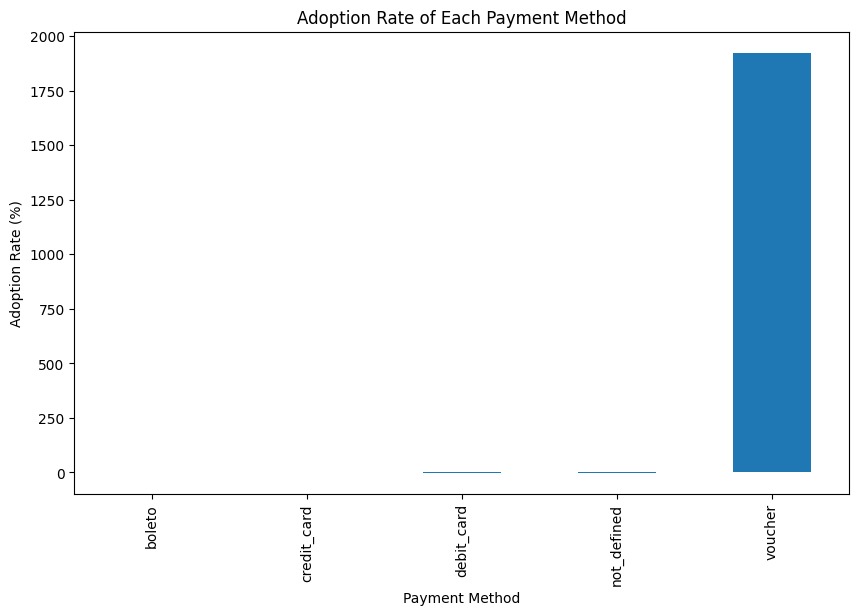

In [31]:
# Calculate adoption rate of each payment method
adoption_rate = data5.groupby('payment_type')['order_id'].count().pct_change()
print(adoption_rate)

# Plot the adoption rate of each payment method
plt.figure(figsize=(10, 6))
adoption_rate.plot(kind='bar')
plt.title('Adoption Rate of Each Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Adoption Rate (%)')
plt.show()

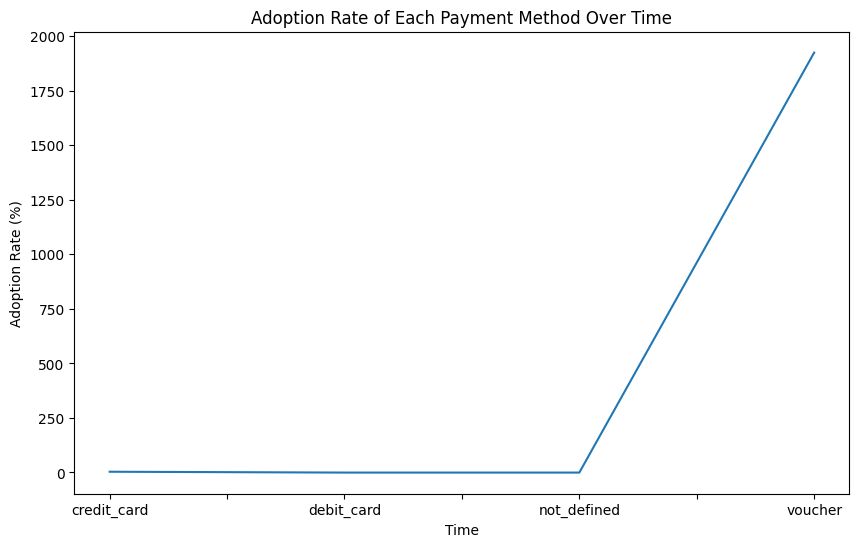

In [28]:
# Plot the adoption rate of each payment method over time
plt.figure(figsize=(10, 6))
adoption_rate.plot(kind='line')
plt.title('Adoption Rate of Each Payment Method Over Time')
plt.xlabel('Time')
plt.ylabel('Adoption Rate (%)')
plt.show()

payment_type
boleto         145.034435
credit_card    163.319021
debit_card     142.570170
not_defined      0.000000
voucher         65.703354
Name: payment_value, dtype: float64


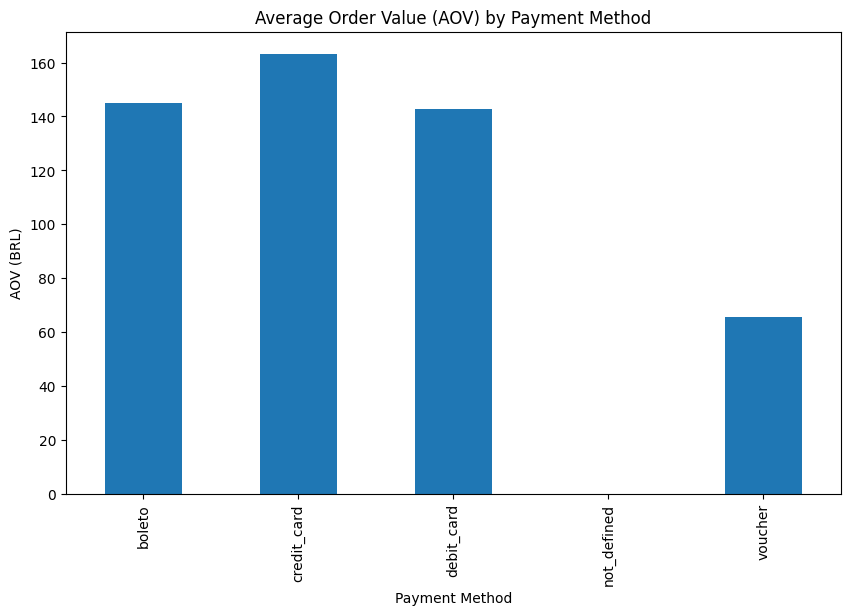

In [30]:
# Calculate AOV for each payment method
aov = data5.groupby('payment_type')['payment_value'].mean()
print(aov)

# Plot the AOV for each payment method
plt.figure(figsize=(10, 6))
aov.plot(kind='bar')
plt.title('Average Order Value (AOV) by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('AOV (BRL)')
plt.show()

In [34]:

# If you want to analyze order frequency, you can do something like this:
order_frequency = data5.groupby('payment_type')['order_id'].nunique()
print(order_frequency)

payment_type
boleto         19784
credit_card    76505
debit_card      1528
not_defined        3
voucher         3866
Name: order_id, dtype: int64


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
data6 = pd.read_csv('olist_customers_dataset.csv')

In [37]:
# Check for missing values
print(data6.isnull().sum())

# Check for duplicate values
print(data6.duplicated().sum())

# Get data types of each column
print(data6.dtypes)

# Get summary statistics of the data
print(data6.describe())

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64
0
customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object
       customer_zip_code_prefix
count              99441.000000
mean               35137.474583
std                29797.938996
min                 1003.000000
25%                11347.000000
50%                24416.000000
75%                58900.000000
max                99990.000000


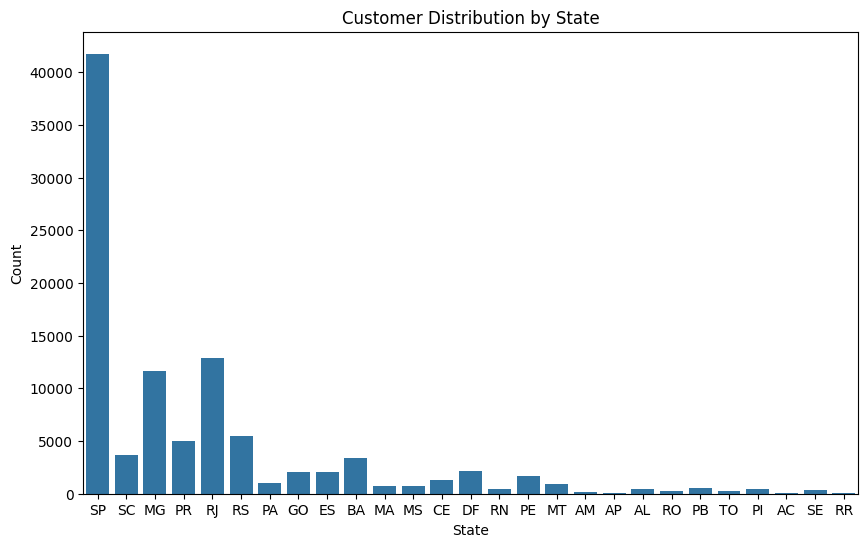

In [38]:
# Plot customer distribution by state
plt.figure(figsize=(10, 6))
sns.countplot(x='customer_state', data=data6)
plt.title('Customer Distribution by State')
plt.xlabel('State')
plt.ylabel('Count')
plt.show()

In [41]:
# Get top 10 cities with most customers
top_cities = data6['customer_city'].value_counts().head(10)
print(top_cities)

customer_city
sao paulo                15540
rio de janeiro            6882
belo horizonte            2773
brasilia                  2131
curitiba                  1521
campinas                  1444
porto alegre              1379
salvador                  1245
guarulhos                 1189
sao bernardo do campo      938
Name: count, dtype: int64


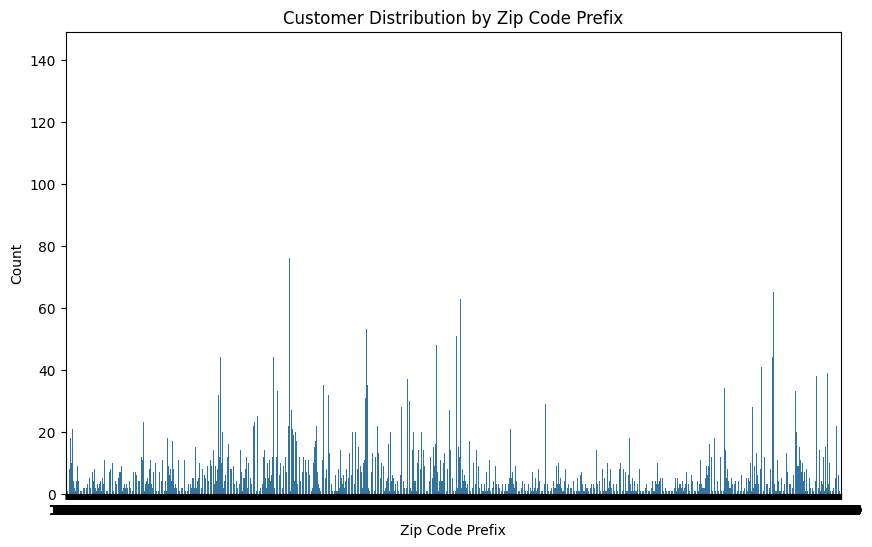

In [42]:
# Plot customer distribution by zip code prefix
plt.figure(figsize=(10, 6))
sns.countplot(x='customer_zip_code_prefix', data=data6)
plt.title('Customer Distribution by Zip Code Prefix')
plt.xlabel('Zip Code Prefix')
plt.ylabel('Count')
plt.show()

customer_state
SP    41.980672
RJ    12.924247
MG    11.700405
RS     5.496727
PR     5.073360
SC     3.657445
BA     3.399000
DF     2.152030
ES     2.044428
GO     2.031355
PE     1.661287
CE     1.343510
PA     0.980481
MT     0.912099
MA     0.751199
MS     0.719019
PB     0.539013
PI     0.497783
RN     0.487726
AL     0.415322
SE     0.351967
TO     0.281574
RO     0.254422
AM     0.148832
AC     0.081455
AP     0.068382
RR     0.046259
Name: proportion, dtype: float64


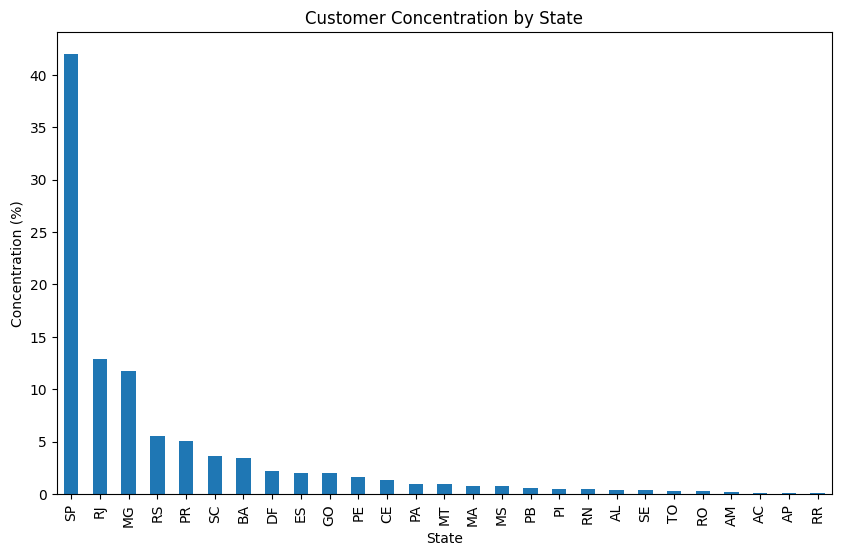

In [43]:
# Calculate customer concentration by state
customer_concentration = data6['customer_state'].value_counts(normalize=True) * 100
print(customer_concentration)

# Plot customer concentration by state
plt.figure(figsize=(10, 6))
customer_concentration.plot(kind='bar')
plt.title('Customer Concentration by State')
plt.xlabel('State')
plt.ylabel('Concentration (%)')
plt.show()

customer_state
AC           NaN
AL      4.098765
AM     -0.641646
AP     -0.540541
BA     48.705882
CE     -0.604734
DF      0.601796
ES     -0.050000
GO     -0.006394
MA     -0.630198
MG     14.575636
MS     -0.938547
MT      0.268531
PA      0.074972
PB     -0.450256
PE      2.082090
PI     -0.700363
PR      9.191919
RJ      1.547473
RN     -0.962263
RO     -0.478351
RR     -0.818182
RS    117.826087
SC     -0.334614
SE     -0.903767
SP    118.274286
TO     -0.993293
Name: customer_id, dtype: float64


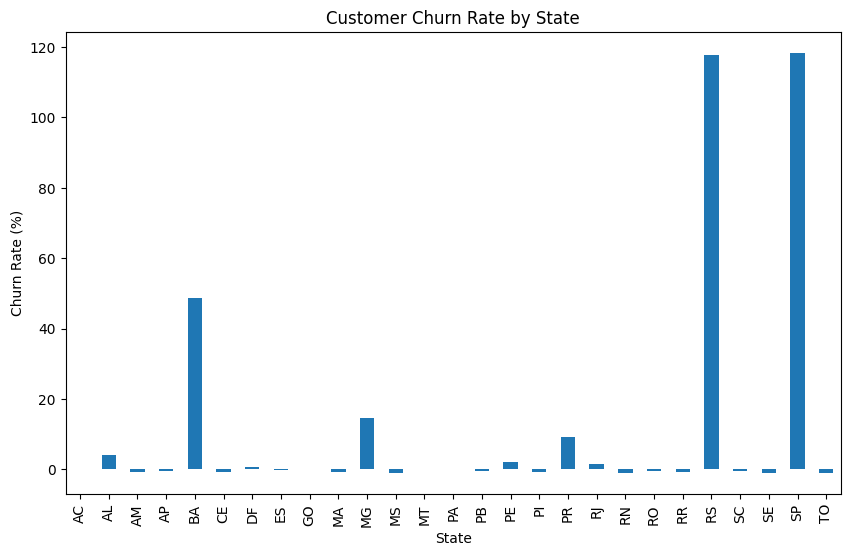

In [45]:
# Calculate customer churn rate by state
churn_rate = data6.groupby('customer_state')['customer_id'].nunique().pct_change()
print(churn_rate)

# Plot customer churn rate by state
plt.figure(figsize=(10, 6))
churn_rate.plot(kind='bar')
plt.title('Customer Churn Rate by State')
plt.xlabel('State')
plt.ylabel('Churn Rate (%)')
plt.show()

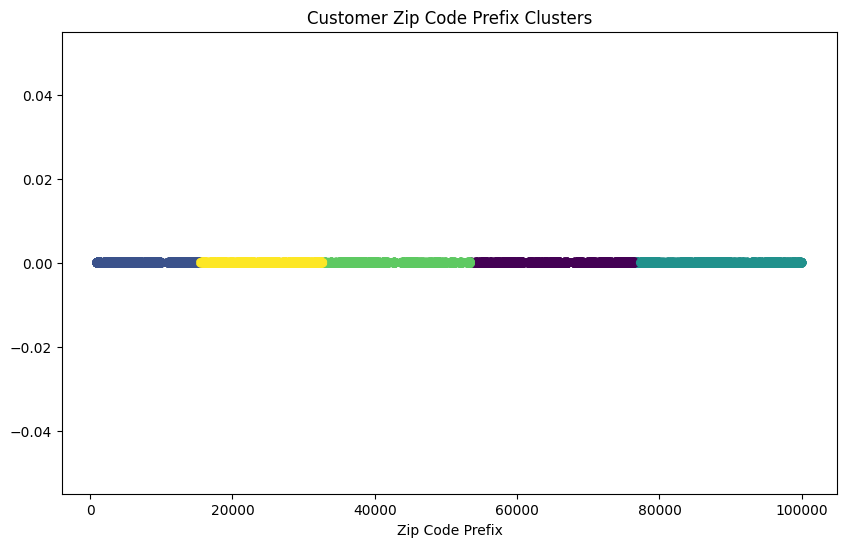

In [46]:
# Cluster customer zip code prefixes using K-Means
from sklearn.cluster import KMeans
zip_code_prefixes = data6['customer_zip_code_prefix'].unique().reshape(-1, 1)
kmeans = KMeans(n_clusters=5)
kmeans.fit(zip_code_prefixes)

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(zip_code_prefixes[:, 0], np.zeros(len(zip_code_prefixes)), c=kmeans.labels_)
plt.title('Customer Zip Code Prefix Clusters')
plt.xlabel('Zip Code Prefix')
plt.show()

customer_state  AC   AL   AM  AP    BA    CE    DF    ES    GO   MA  ...  \
customer_state                                                       ...   
AC              81    0    0   0     0     0     0     0     0    0  ...   
AL               0  413    0   0     0     0     0     0     0    0  ...   
AM               0    0  148   0     0     0     0     0     0    0  ...   
AP               0    0    0  68     0     0     0     0     0    0  ...   
BA               0    0    0   0  3380     0     0     0     0    0  ...   
CE               0    0    0   0     0  1336     0     0     0    0  ...   
DF               0    0    0   0     0     0  2140     0     0    0  ...   
ES               0    0    0   0     0     0     0  2033     0    0  ...   
GO               0    0    0   0     0     0     0     0  2020    0  ...   
MA               0    0    0   0     0     0     0     0     0  747  ...   
MG               0    0    0   0     0     0     0     0     0    0  ...   
MS          

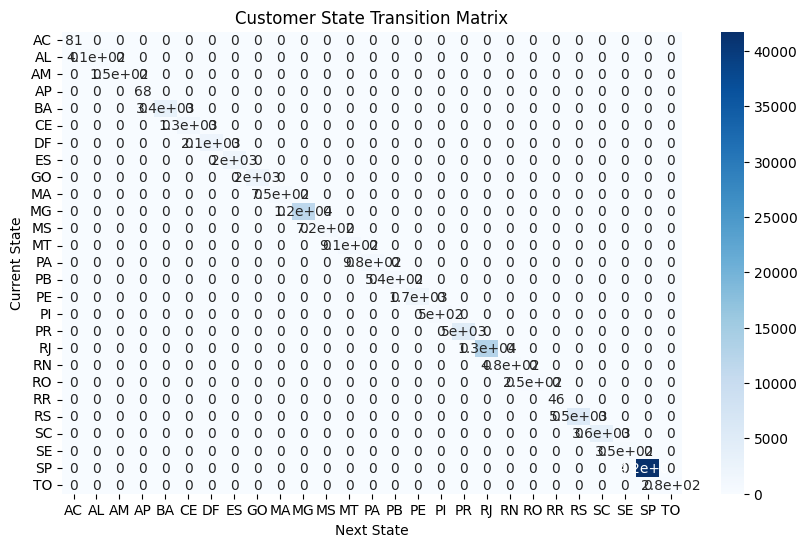

In [47]:
# Create a customer state transition matrix
transition_matrix = pd.crosstab(data6['customer_state'], data6['customer_state'])
print(transition_matrix)

# Plot the transition matrix
plt.figure(figsize=(10, 6))
sns.heatmap(transition_matrix, annot=True, cmap='Blues')
plt.title('Customer State Transition Matrix')
plt.xlabel('Next State')
plt.ylabel('Current State')
plt.show()

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
data7 = pd.read_csv('product_category_name_translation.csv')

In [51]:
# Check for missing values
print(data7.isnull().sum())

# Check for duplicate values
print(data7.duplicated().sum())

# Get data types of each column
print(data7.dtypes)

# Get summary statistics of the data
print(data7.describe())

product_category_name            0
product_category_name_english    0
dtype: int64
0
product_category_name            object
product_category_name_english    object
dtype: object
       product_category_name product_category_name_english
count                     71                            71
unique                    71                            71
top             beleza_saude                 health_beauty
freq                       1                             1


In [53]:
# Merge data5 and data6 on customer_id
merged_data = pd.merge(data5, data6, on='customer_id')

# Analyze customer purchase behavior
customer_purchase_behavior = merged_data.groupby('customer_id')['order_id'].count()
print(customer_purchase_behavior)

# Plot customer purchase behavior
plt.figure(figsize=(10, 6))
sns.distplot(customer_purchase_behavior)
plt.title('Customer Purchase Behavior')
plt.xlabel('Number of Orders')
plt.ylabel('Frequency')
plt.show()

KeyError: 'customer_id'